# Read in CSV File

In [1]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Read in csv file
df = pd.read_csv("NBA Players.csv")

#Set display options to allow max columns
pd.set_option('display.max_columns',None)

#Display head and tail
display(df.head())
display(df.tail())

,name,position,games,career_length,ppg,rpg,apg,per,fg,ft,win_shares,all_stars,all_nba,all_defense,rookie_team,mvps,chips,roy,dpoys,scoring_champ,hof
0,Jerry West,SG,932,14,27.0,5.8,6.7,22.9,47.4,81.4,162.6,14,12,5,0,0,1,0,0,1,1
1,Dick Barnett,SG,971,14,15.8,2.9,2.8,14.7,45.6,76.1,68.7,1,0,0,0,0,2,0,0,0,1
2,Chauncey Billups,PG,1043,17,15.2,2.9,5.4,18.8,41.5,89.4,120.8,5,3,2,0,0,1,0,0,0,1
3,Vince Carter,SG,1541,22,16.7,4.3,3.1,18.6,43.5,79.8,125.3,8,2,0,1,0,0,1,0,0,1
4,Michael Cooper,SG,873,12,8.9,3.2,4.2,12.8,46.9,83.3,52.5,0,0,8,0,0,5,0,1,0,1


,name,position,games,career_length,ppg,rpg,apg,per,fg,ft,win_shares,all_stars,all_nba,all_defense,rookie_team,mvps,chips,roy,dpoys,scoring_champ,hof
555,Chris Gatling,PF,700,11,10.3,5.3,0.7,17.6,51.3,66.0,32.1,1,0,0,0,0,0,0,0,0,0
556,Mike James,PG,595,12,9.9,2.2,3.5,14.0,41.7,80.2,22.3,0,0,0,0,0,1,0,0,0,0
557,Eddie House,PG,717,11,7.5,1.7,1.6,13.2,40.9,85.1,20.0,0,0,0,0,0,1,0,0,0,0
558,Ricky Davis,SG,736,12,13.5,3.5,3.3,14.7,44.6,78.1,28.0,0,0,0,0,0,0,0,0,0,0
559,Drew Gooden,PF,790,14,11.0,7.1,1.1,16.3,46.2,76.0,43.9,0,0,0,1,0,0,0,0,0,0


In [3]:
#Update HOF Status for Dwight Howard who was just recently joined the HOF
df[df['name'].str.contains('Dwight')] #Find the index
df.loc[155, 'hof'] = 1 #Correct his HOF status based off his index

In [3]:
#Check shape
df.shape

(560, 21)

In [4]:
#Check info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           560 non-null    object 
 1   position       560 non-null    object 
 2   games          560 non-null    int64  
 3   career_length  560 non-null    int64  
 4   ppg            560 non-null    float64
 5   rpg            560 non-null    float64
 6   apg            560 non-null    float64
 7   per            560 non-null    float64
 8   fg             560 non-null    float64
 9   ft             560 non-null    float64
 10  win_shares     560 non-null    float64
 11  all_stars      560 non-null    int64  
 12  all_nba        560 non-null    int64  
 13  all_defense    560 non-null    int64  
 14  rookie_team    560 non-null    int64  
 15  mvps           560 non-null    int64  
 16  chips          560 non-null    int64  
 17  roy            560 non-null    int64  
 18  dpoys     

In [5]:
#Check missing values
df.isnull().sum()

name             0
position         0
games            0
career_length    0
ppg              0
rpg              0
apg              0
per              0
fg               0
ft               0
win_shares       0
all_stars        0
all_nba          0
all_defense      0
rookie_team      0
mvps             0
chips            0
roy              0
dpoys            0
scoring_champ    0
hof              0
dtype: int64

# Begin EDA

## General EDA

In [51]:
#Check descriptive statistics
df.describe()

,games,career_length,ppg,rpg,apg,per,fg,ft,win_shares,all_stars,all_nba,all_defense,rookie_team,mvps,chips,roy,dpoys,scoring_champ,hof
count,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000
mean,806.198214,12.276786,12.668393,5.390893,2.753214,15.864464,46.249464,75.412500,61.862679,2.585714,1.464286,0.735714,0.380357,0.114286,0.839286,0.103571,0.057143,0.112500,0.275000
std,291.091822,3.723469,5.505894,3.126362,1.853708,3.625087,4.431898,8.239724,42.448316,3.660915,2.843341,2.027047,0.485909,0.565378,1.475825,0.304976,0.354303,0.660558,0.446913
min,51.000000,2.000000,1.000000,0.000000,0.100000,0.000000,30.200000,37.500000,-1.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,644.000000,10.000000,8.200000,3.000000,1.400000,13.550000,43.400000,71.450000,32.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,835.000000,13.000000,12.600000,4.600000,2.300000,15.800000,46.100000,76.900000,58.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,981.750000,15.000000,16.700000,7.125000,3.700000,18.025000,49.325000,80.700000,80.000000,4.000000,2.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,1611.000000,22.000000,30.100000,22.900000,11.200000,27.900000,59.700000,90.400000,273.400000,19.000000,15.000000,15.000000,1.000000,6.000000,11.000000,1.000000,4.000000,10.000000,1.000000


In [52]:
#Subset HOF status and then check descriptive statistics
hof = df[df['hof'] == 1]
non_hof = df[df['hof'] == 0]

#Check stats for each
print('HOF Players Descriptive Statistics:')
display(hof.describe())
print('Non-HOF Players Dscriptive Statistics:')
display(non_hof.describe())

HOF Players Descriptive Statistics:


,games,career_length,ppg,rpg,apg,per,fg,ft,win_shares,all_stars,all_nba,all_defense,rookie_team,mvps,chips,roy,dpoys,scoring_champ,hof
count,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.0
mean,912.714286,13.103896,17.662987,7.366234,3.741558,18.959740,46.395455,76.644805,99.965584,6.954545,4.454545,1.681818,0.538961,0.409091,1.714286,0.266234,0.155844,0.402597,1.0
std,299.518584,3.895982,4.784574,4.003727,1.917436,3.600536,5.183538,7.625979,50.168236,4.031479,3.895852,3.204785,0.500106,1.020148,2.119669,0.443430,0.617076,1.212783,0.0
min,139.000000,3.000000,5.700000,0.000000,1.000000,0.000000,30.200000,41.400000,11.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,722.250000,11.000000,15.125000,4.125000,2.400000,17.200000,43.600000,73.525000,67.950000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,912.500000,13.000000,17.850000,6.350000,3.350000,18.850000,46.750000,77.950000,91.550000,6.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.0
75%,1076.250000,15.000000,20.375000,9.975000,4.475000,21.175000,50.275000,81.000000,126.125000,10.000000,6.000000,2.000000,1.000000,0.000000,2.000000,1.000000,0.000000,0.000000,1.0
max,1611.000000,22.000000,30.100000,22.900000,11.200000,27.900000,58.700000,90.400000,273.400000,19.000000,15.000000,15.000000,1.000000,6.000000,11.000000,1.000000,4.000000,10.000000,1.0


Non-HOF Players Dscriptive Statistics:


,games,career_length,ppg,rpg,apg,per,fg,ft,win_shares,all_stars,all_nba,all_defense,rookie_team,mvps,chips,roy,dpoys,scoring_champ,hof
count,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.0
mean,765.795567,11.963054,10.773892,4.641626,2.378325,14.690394,46.194089,74.945074,47.409852,0.928571,0.330049,0.376847,0.320197,0.002463,0.507389,0.041872,0.019704,0.002463,0.0
std,277.692156,3.611520,4.484443,2.321316,1.685706,2.866328,4.116881,8.422757,27.834259,1.532309,0.857463,1.149710,0.467128,0.049629,0.952551,0.200544,0.155891,0.049629,0.0
min,51.000000,2.000000,1.000000,0.900000,0.100000,5.200000,30.400000,37.500000,-1.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,607.500000,10.000000,7.200000,2.800000,1.200000,12.700000,43.325000,70.900000,23.350000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,805.000000,12.500000,10.900000,4.100000,1.900000,14.900000,46.000000,76.500000,51.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,948.250000,14.000000,14.075000,6.300000,3.175000,16.500000,48.900000,80.700000,63.850000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0
max,1424.000000,21.000000,20.700000,11.900000,9.100000,22.000000,59.700000,90.400000,124.900000,8.000000,5.000000,8.000000,1.000000,1.000000,7.000000,1.000000,2.000000,1.000000,0.0


In [53]:
#Check categorical variables
df.describe(include='O')

,name,position
count,560,560
unique,560,5
top,Mario West,PF
freq,1,138


In [55]:
#Check for each subset
print('HOF Players: ')
display(hof.describe(include='O'))
print('Non-HOF Players: ')
display(non_hof.describe(include='O'))

HOF Players: 


,name,position
count,154,154
unique,154,5
top,Jerry West,C
freq,1,37


Non-HOF Players: 


,name,position
count,406,406
unique,406,5
top,Drew Gooden,PF
freq,1,113


In [5]:
#Set figure size
plt.rcParams.update({'figure.figsize': (8,6)})

## Position

In [56]:
#Check frequency
df['position'].value_counts().reset_index()

,position,count
0,PF,138
1,PG,130
2,SG,104
3,SF,101
4,C,87


In [57]:
#Check for each subset
print('HOF Players: ')
display(hof['position'].value_counts().reset_index())
print('Non-HOF Players: ')
display(non_hof['position'].value_counts().reset_index())

HOF Players: 


,position,count
0,C,37
1,SG,35
2,SF,29
3,PG,28
4,PF,25


Non-HOF Players: 


,position,count
0,PF,113
1,PG,102
2,SF,72
3,SG,69
4,C,50


C:\Users\KRAyu\AppData\Local\Temp\ipykernel_24952\2218905964.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.barplot(x='position', y='count', data=hof_positions, palette='twilight_shifted')


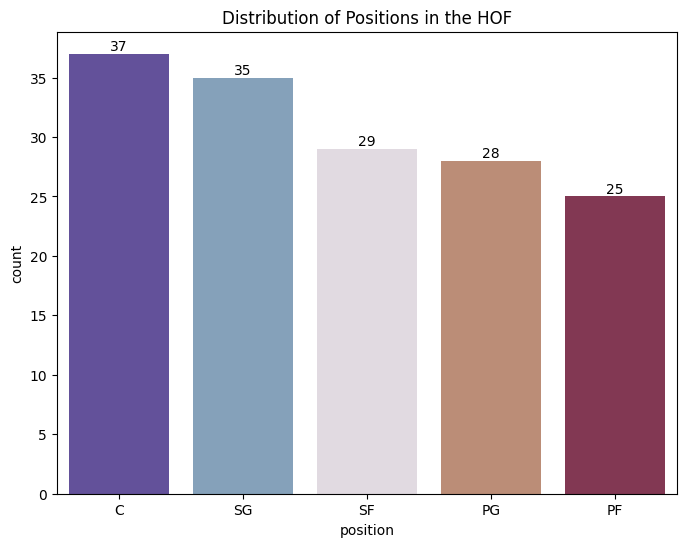

In [58]:
#Visualize proportion of positions in the hall of fame
hof = df[df['hof'] == 1] #Subset data to include only hof players
hof_positions = hof['position'].value_counts().reset_index() #Get counts of positions and turn result into a dataframe

#Visualize result
plot = sns.barplot(x='position', y='count', data=hof_positions, palette='twilight_shifted')

#Annotate
plt.title('Distribution of Positions in the HOF')
for i in plot.containers:
    plot.bar_label(i, )

#Display
plt.show()

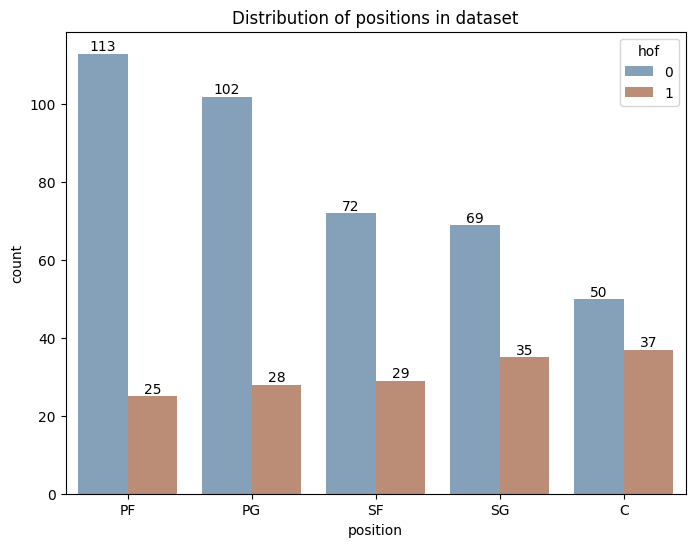

In [59]:
#Check the distribution given our data
positions = df.groupby('hof')['position'].value_counts().reset_index()

#Visualize result
plot = sns.barplot(x='position', y='count', hue='hof', data=positions, palette='twilight_shifted')

#Annotate
plt.title('Distribution of positions in dataset')
for i in plot.containers:
    plot.bar_label(i, )

#Display
plt.show()

Given this it'd be best not to use position as a feature in our model, given the uneven distribution of players in the hof. 

## Games

In [60]:
#Check descriptive statistics for each
print('Games Played for HOF Players:')
print(hof['games'].describe())
print('\nGames Played for Non-HOF Players:')
print(non_hof['games'].describe())

Games Played for HOF Players:
count     154.000000
mean      912.714286
std       299.518584
min       139.000000
25%       722.250000
50%       912.500000
75%      1076.250000
max      1611.000000
Name: games, dtype: float64

Games Played for Non-HOF Players:
count     406.000000
mean      765.795567
std       277.692156
min        51.000000
25%       607.500000
50%       805.000000
75%       948.250000
max      1424.000000
Name: games, dtype: float64


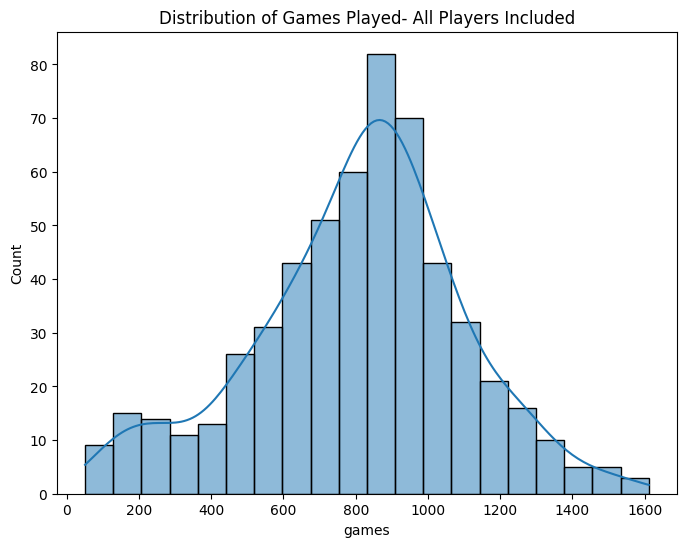

In [61]:
#Check distribution of the data
sns.histplot(x='games', data=df, kde=True)
plt.title('Distribution of Games Played- All Players Included')
plt.show()

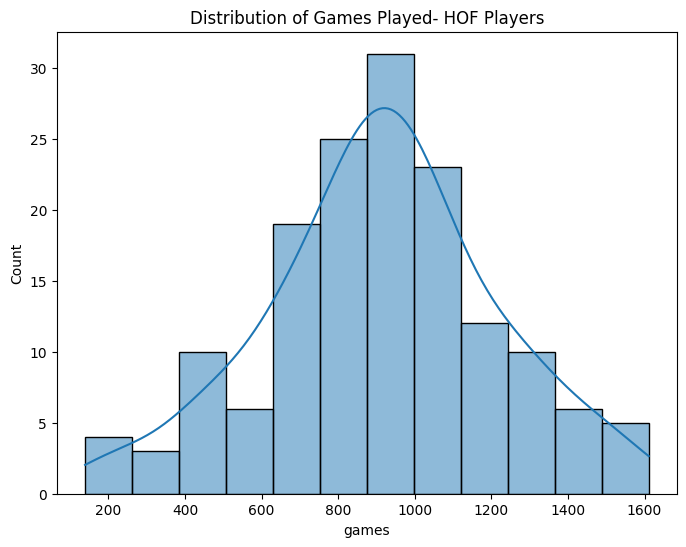

In [62]:
#Check distribution of the data
sns.histplot(x='games', data=hof, kde=True)
plt.title('Distribution of Games Played- HOF Players')
plt.show()

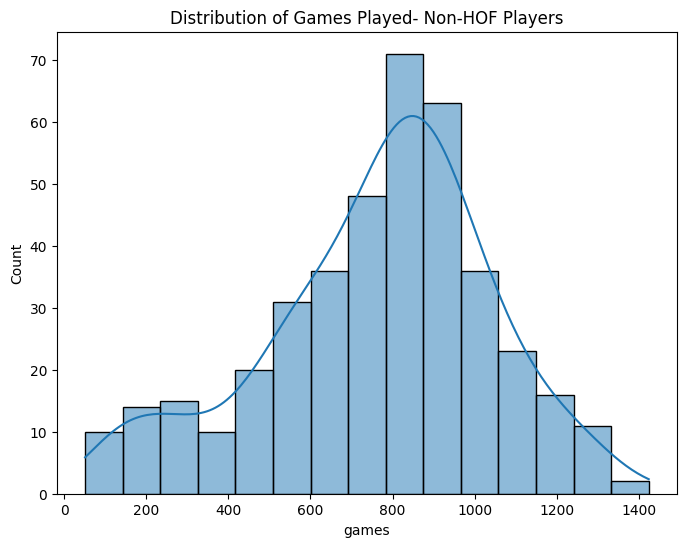

In [63]:
#Check distribution of the data
sns.histplot(x='games', data=non_hof, kde=True)
plt.title('Distribution of Games Played- Non-HOF Players')
plt.show()

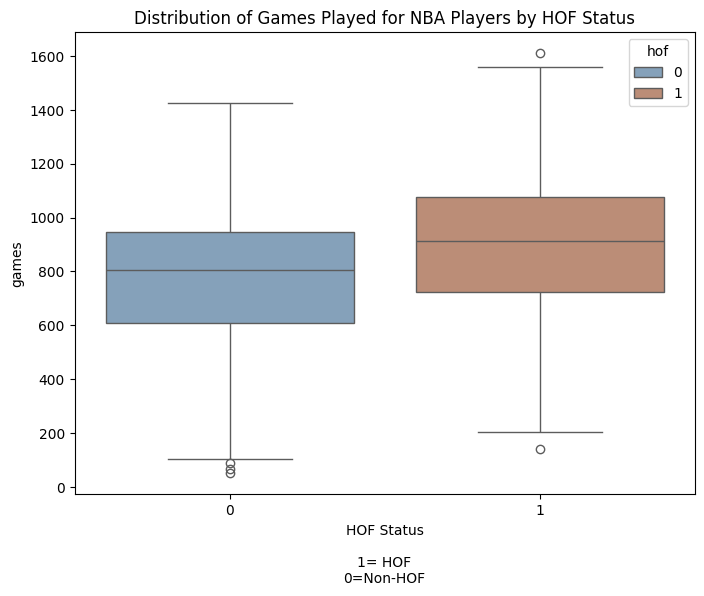

In [64]:
#Make grouped boxplot to analyze the differ in games played by HOF status
sns.boxplot(x='hof', y='games',data=df, hue='hof', palette='twilight_shifted')
plt.title('Distribution of Games Played for NBA Players by HOF Status')
plt.xlabel('HOF Status\n\n1= HOF\n0=Non-HOF')
plt.show()

## Career Length

In [65]:
#Check descriptive statistics for each
print('Career Length for HOF Players:')
print(hof['career_length'].describe())
print('\nCareer Length for Non-HOF Players:')
print(non_hof['career_length'].describe())

Career Length for HOF Players:
count    154.000000
mean      13.103896
std        3.895982
min        3.000000
25%       11.000000
50%       13.000000
75%       15.000000
max       22.000000
Name: career_length, dtype: float64

Career Length for Non-HOF Players:
count    406.000000
mean      11.963054
std        3.611520
min        2.000000
25%       10.000000
50%       12.500000
75%       14.000000
max       21.000000
Name: career_length, dtype: float64


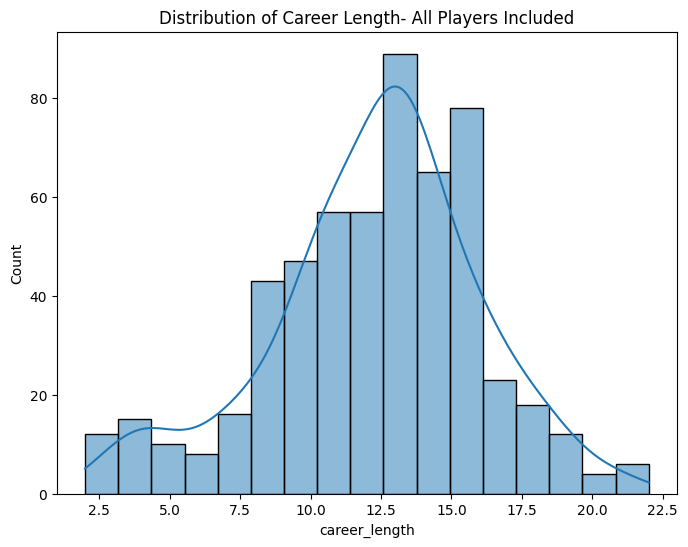

In [66]:
#Check distribution of the data
sns.histplot(x='career_length', data=df, kde=True)
plt.title('Distribution of Career Length- All Players Included')
plt.show()

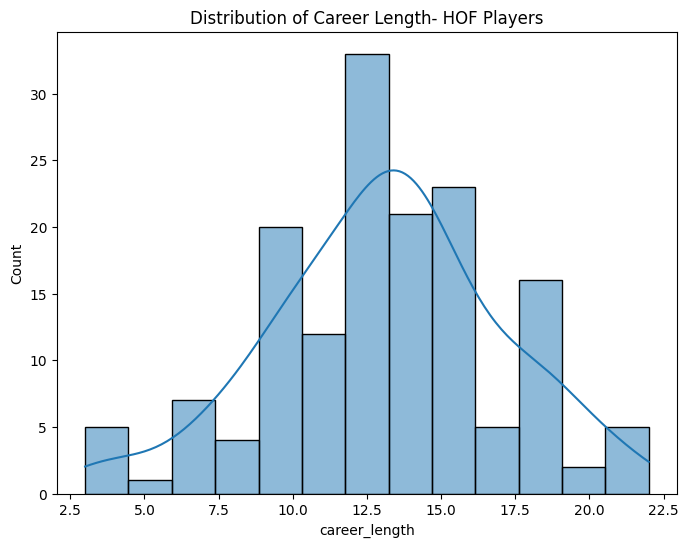

In [67]:
#Check distribution of the data
sns.histplot(x='career_length', data=hof, kde=True)
plt.title('Distribution of Career Length- HOF Players')
plt.show()

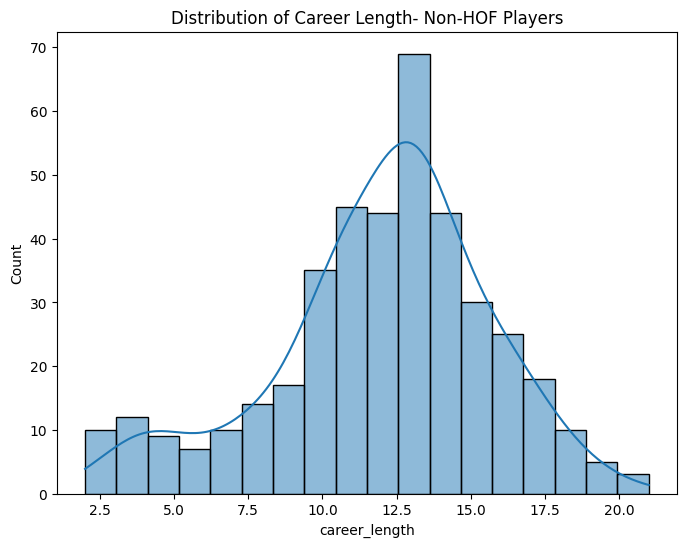

In [27]:
#Check distribution of the data
sns.histplot(x='career_length', data=non_hof, kde=True)
plt.title('Distribution of Career Length- Non-HOF Players')
plt.show()

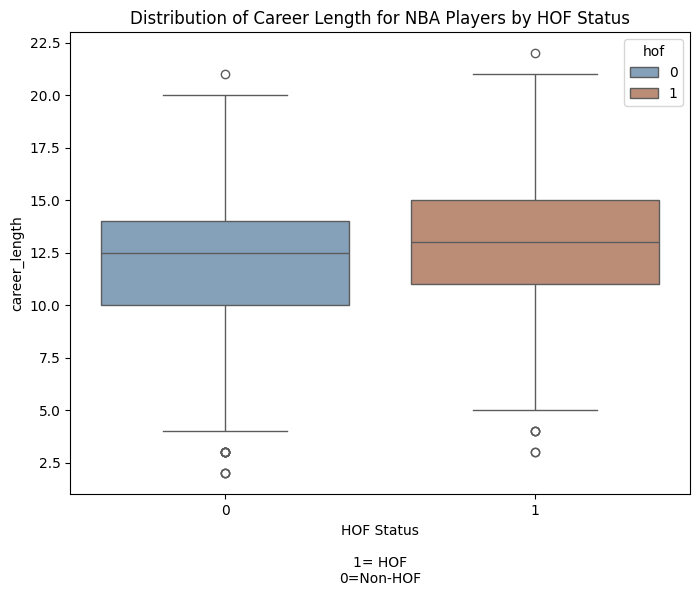

In [68]:
#Make grouped boxplot to analyze the differ in games played by HOF status
sns.boxplot(x='hof', y='career_length',data=df, hue='hof', palette='twilight_shifted')
plt.title('Distribution of Career Length for NBA Players by HOF Status')
plt.xlabel('HOF Status\n\n1= HOF\n0=Non-HOF')
plt.show()

## Points per game (PPG)

In [69]:
#Check descriptive statistics for each
print('Points Per Game for HOF Players:')
print(hof['ppg'].describe())
print('\nPoints Per Game for Non-HOF Players:')
print(non_hof['ppg'].describe())

Points Per Game for HOF Players:
count    154.000000
mean      17.662987
std        4.784574
min        5.700000
25%       15.125000
50%       17.850000
75%       20.375000
max       30.100000
Name: ppg, dtype: float64

Points Per Game for Non-HOF Players:
count    406.000000
mean      10.773892
std        4.484443
min        1.000000
25%        7.200000
50%       10.900000
75%       14.075000
max       20.700000
Name: ppg, dtype: float64


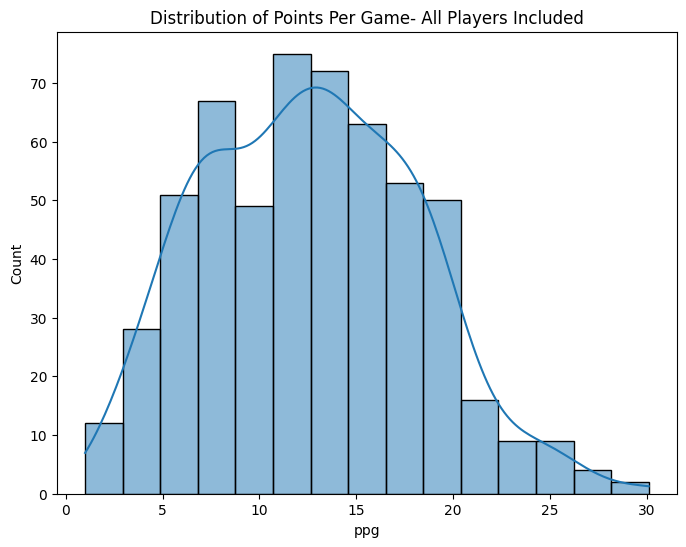

In [70]:
#Check distribution of the data
sns.histplot(x='ppg', data=df, kde=True)
plt.title('Distribution of Points Per Game- All Players Included')
plt.show()

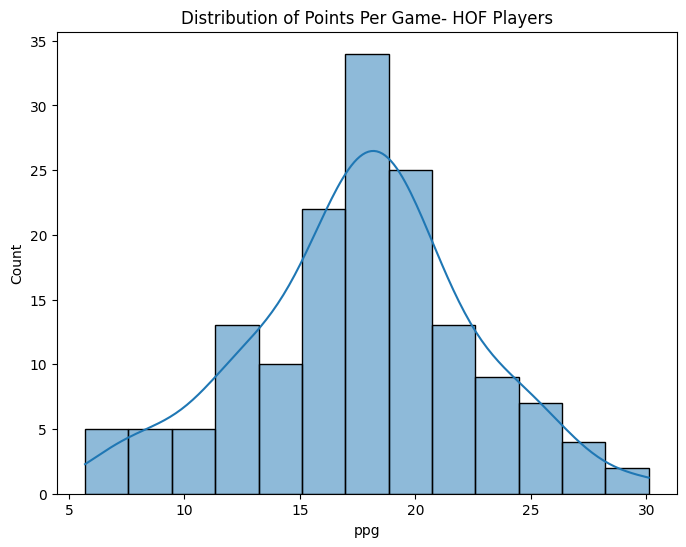

In [71]:
#Check distribution of the data
sns.histplot(x='ppg', data=hof, kde=True)
plt.title('Distribution of Points Per Game- HOF Players')
plt.show()

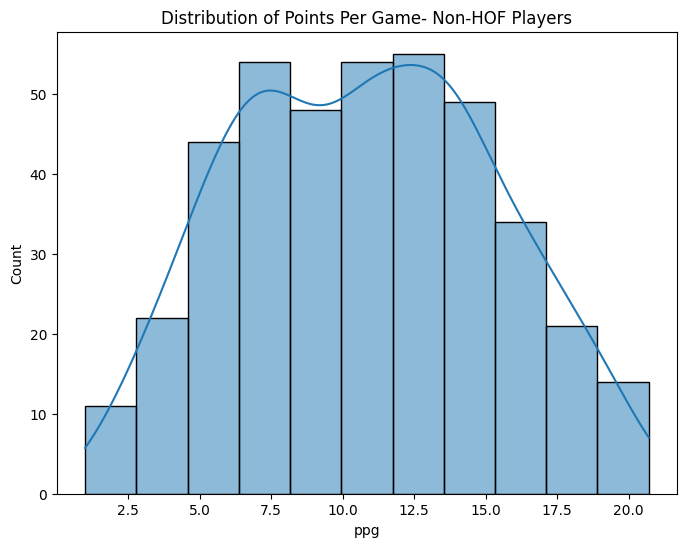

In [72]:
#Check distribution of the data
sns.histplot(x='ppg', data=non_hof, kde=True)
plt.title('Distribution of Points Per Game- Non-HOF Players')
plt.show()

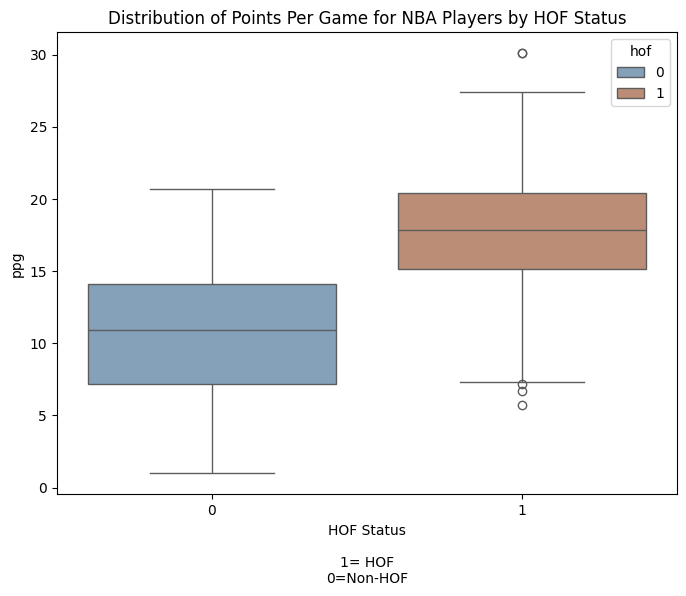

In [73]:
#Make grouped boxplot to analyze the differ in games played by HOF status
sns.boxplot(x='hof', y='ppg',data=df, hue='hof', palette='twilight_shifted')
plt.title('Distribution of Points Per Game for NBA Players by HOF Status')
plt.xlabel('HOF Status\n\n1= HOF\n0=Non-HOF')
plt.show()

## RPG

In [78]:
#Check descriptive statistics for each
print('Rebounds Per Game for HOF Players:')
print(hof['rpg'].describe())
print('\nRebounds Per Game for Non-HOF Players:')
print(non_hof['rpg'].describe())

Rebounds Per Game for HOF Players:
count    154.000000
mean       7.366234
std        4.003727
min        0.000000
25%        4.125000
50%        6.350000
75%        9.975000
max       22.900000
Name: rpg, dtype: float64

Rebounds Per Game for Non-HOF Players:
count    406.000000
mean       4.641626
std        2.321316
min        0.900000
25%        2.800000
50%        4.100000
75%        6.300000
max       11.900000
Name: rpg, dtype: float64


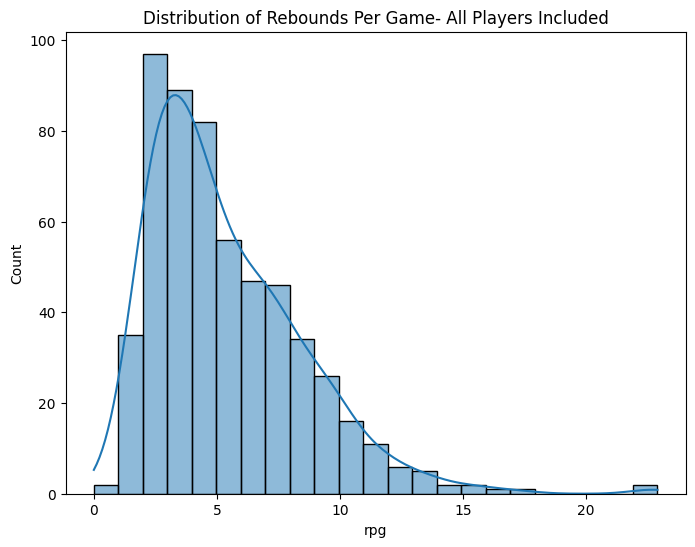

In [77]:
#Check distribution of the data
sns.histplot(x='rpg', data=df, kde=True)
plt.title('Distribution of Rebounds Per Game- All Players Included')
plt.show()

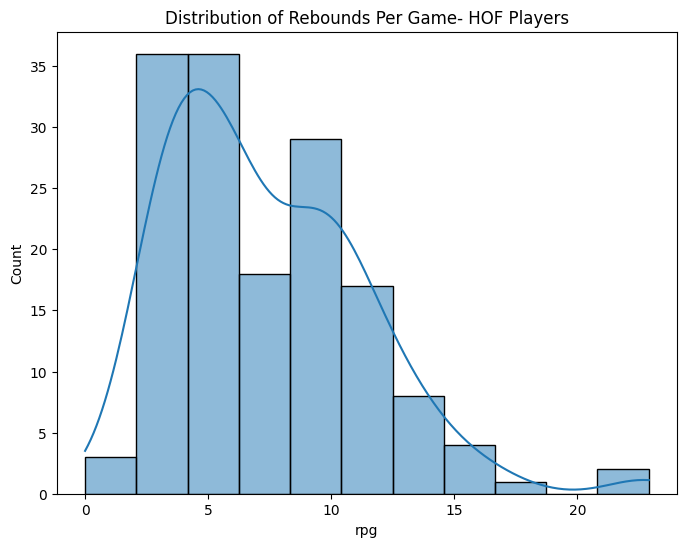

In [76]:
#Check distribution of the data
sns.histplot(x='rpg', data=hof, kde=True)
plt.title('Distribution of Rebounds Per Game- HOF Players')
plt.show()

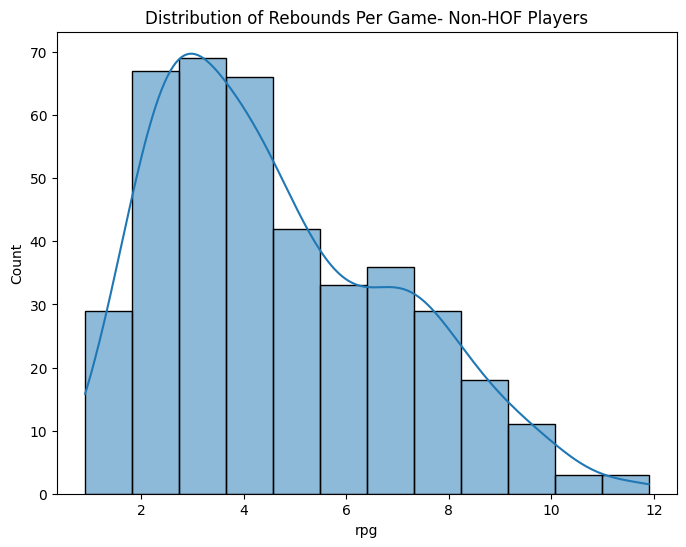

In [79]:
#Check distribution of the data
sns.histplot(x='rpg', data=non_hof, kde=True)
plt.title('Distribution of Rebounds Per Game- Non-HOF Players')
plt.show()

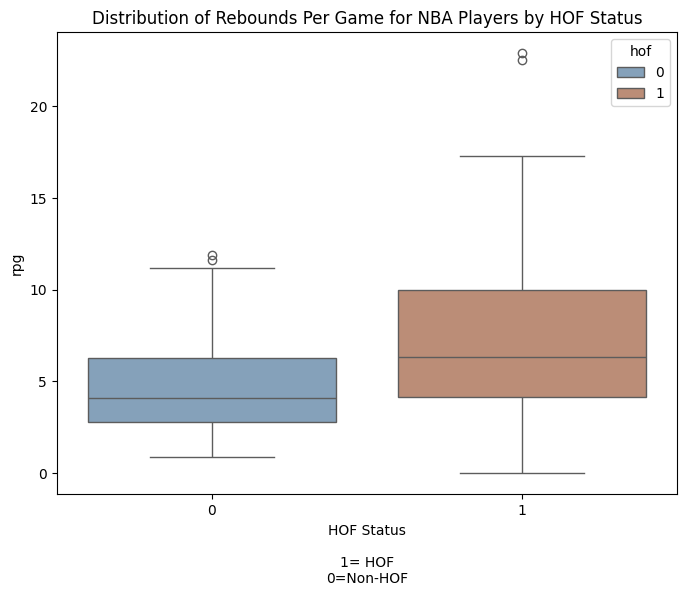

In [80]:
#Make grouped boxplot to analyze the differ in games played by HOF status
sns.boxplot(x='hof', y='rpg',data=df, hue='hof', palette='twilight_shifted')
plt.title('Distribution of Rebounds Per Game for NBA Players by HOF Status')
plt.xlabel('HOF Status\n\n1= HOF\n0=Non-HOF')
plt.show()

## APG

In [81]:
#Check descriptive statistics for each
print('Assits Per Game for HOF Players:')
print(hof['apg'].describe())
print('\nAssits Per Game for Non-HOF Players:')
print(non_hof['apg'].describe())

Assits Per Game for HOF Players:
count    154.000000
mean       3.741558
std        1.917436
min        1.000000
25%        2.400000
50%        3.350000
75%        4.475000
max       11.200000
Name: apg, dtype: float64

Assits Per Game for Non-HOF Players:
count    406.000000
mean       2.378325
std        1.685706
min        0.100000
25%        1.200000
50%        1.900000
75%        3.175000
max        9.100000
Name: apg, dtype: float64


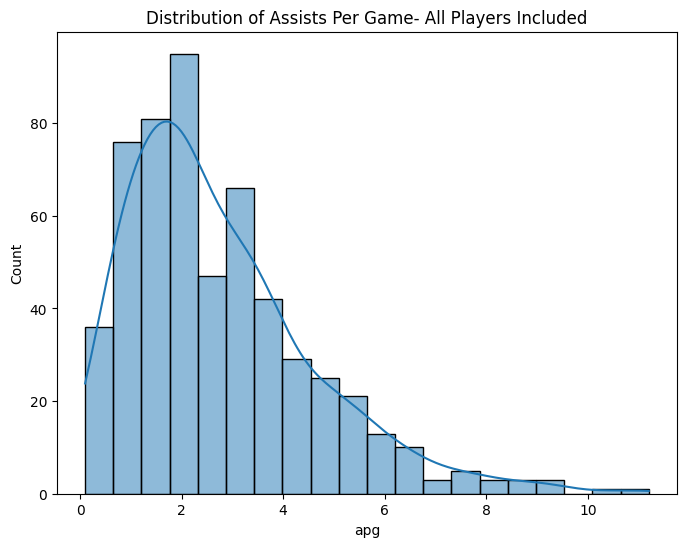

In [83]:
#Check distribution of the data
sns.histplot(x='apg', data=df, kde=True)
plt.title('Distribution of Assists Per Game- All Players Included')
plt.show()

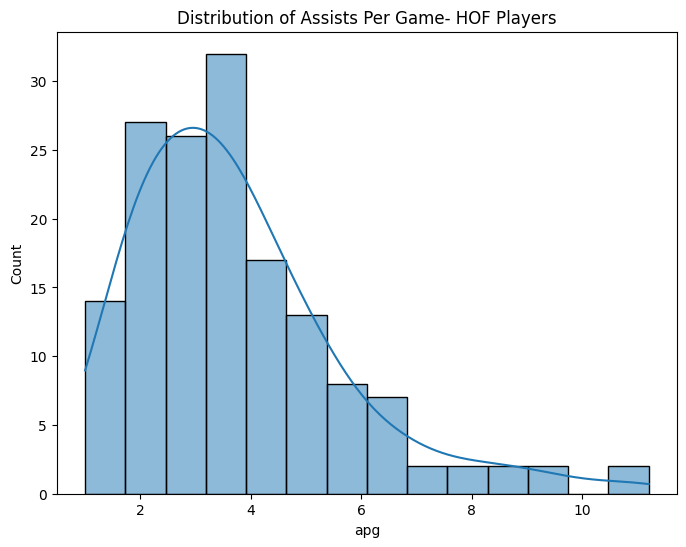

In [84]:
#Check distribution of the data
sns.histplot(x='apg', data=hof, kde=True)
plt.title('Distribution of Assists Per Game- HOF Players')
plt.show()

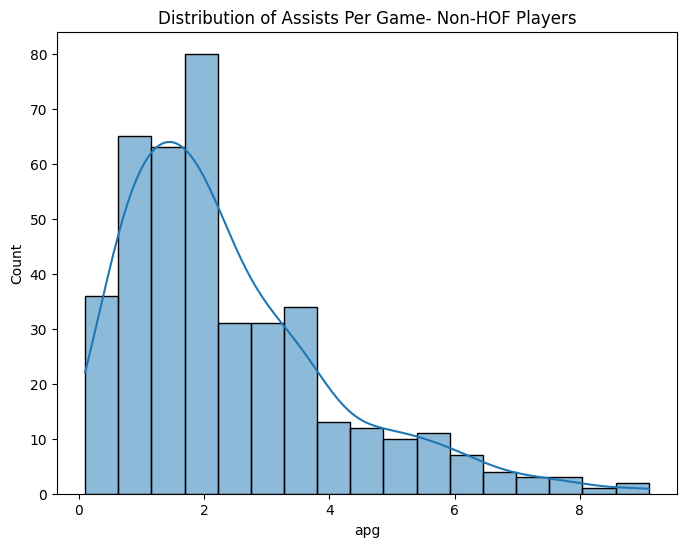

In [85]:
#Check distribution of the data
sns.histplot(x='apg', data=non_hof, kde=True)
plt.title('Distribution of Assists Per Game- Non-HOF Players')
plt.show()

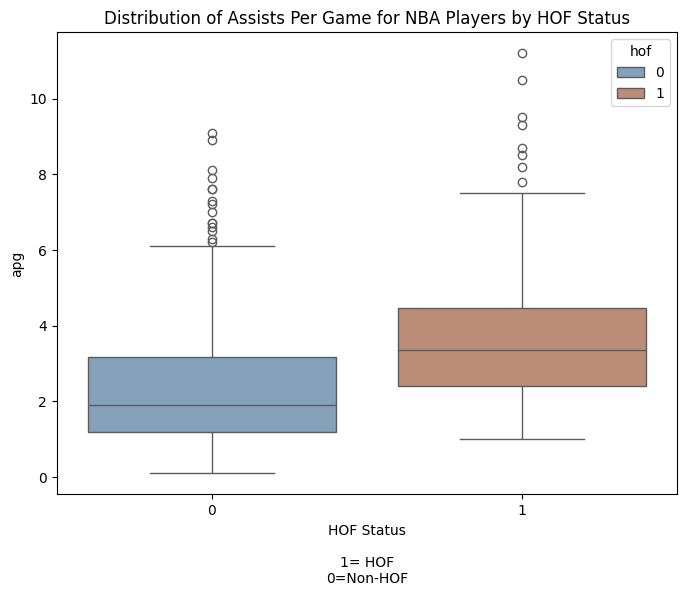

In [86]:
#Make grouped boxplot to analyze the differ in games played by HOF status
sns.boxplot(x='hof', y='apg',data=df, hue='hof', palette='twilight_shifted')
plt.title('Distribution of Assists Per Game for NBA Players by HOF Status')
plt.xlabel('HOF Status\n\n1= HOF\n0=Non-HOF')
plt.show()

## PER

In [88]:
#Check descriptive statistics for each
print('PER for HOF Players:')
print(hof['per'].describe())
print('\nPER for Non-HOF Players:')
print(non_hof['per'].describe())

PER for HOF Players:
count    154.000000
mean      18.959740
std        3.600536
min        0.000000
25%       17.200000
50%       18.850000
75%       21.175000
max       27.900000
Name: per, dtype: float64

PER for Non-HOF Players:
count    406.000000
mean      14.690394
std        2.866328
min        5.200000
25%       12.700000
50%       14.900000
75%       16.500000
max       22.000000
Name: per, dtype: float64


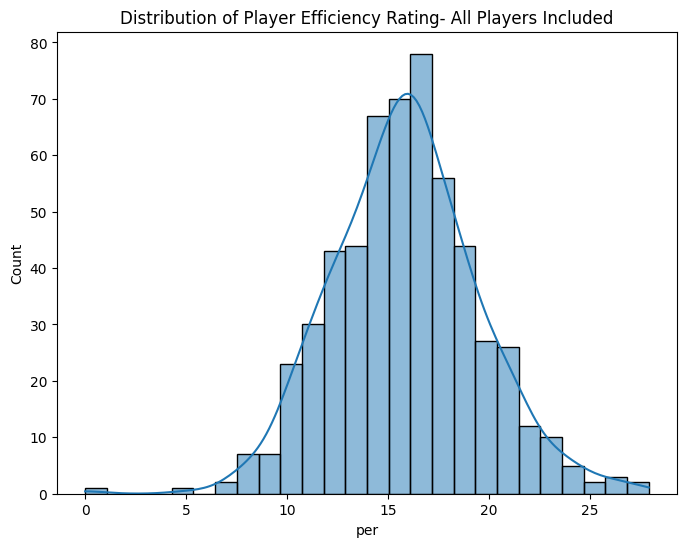

In [90]:
#Check distribution of the data
sns.histplot(x='per', data=df, kde=True)
plt.title('Distribution of Player Efficiency Rating- All Players Included')
plt.show()

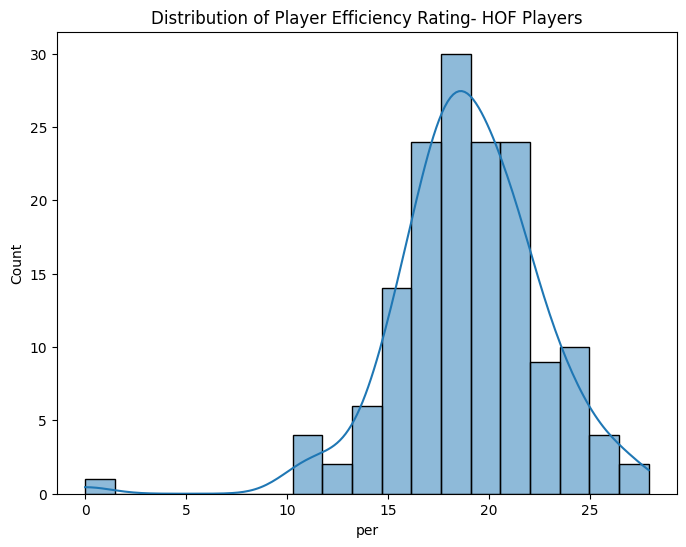

In [91]:
#Check distribution of the data
sns.histplot(x='per', data=hof, kde=True)
plt.title('Distribution of Player Efficiency Rating- HOF Players')
plt.show()

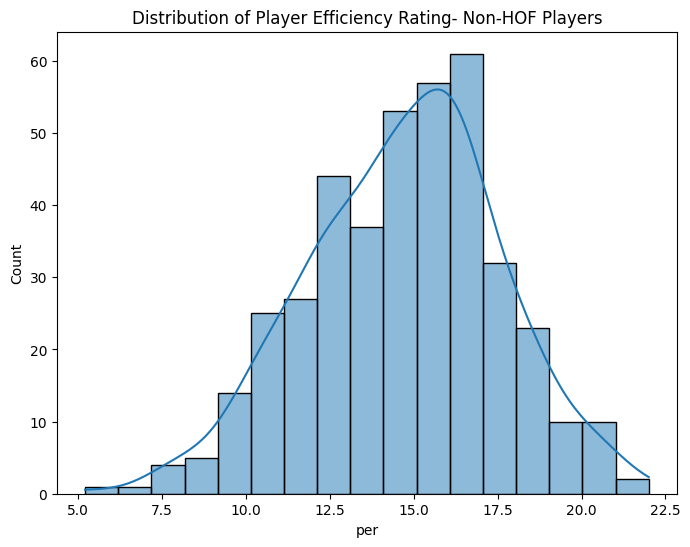

In [92]:
#Check distribution of the data
sns.histplot(x='per', data=non_hof, kde=True)
plt.title('Distribution of Player Efficiency Rating- Non-HOF Players')
plt.show()

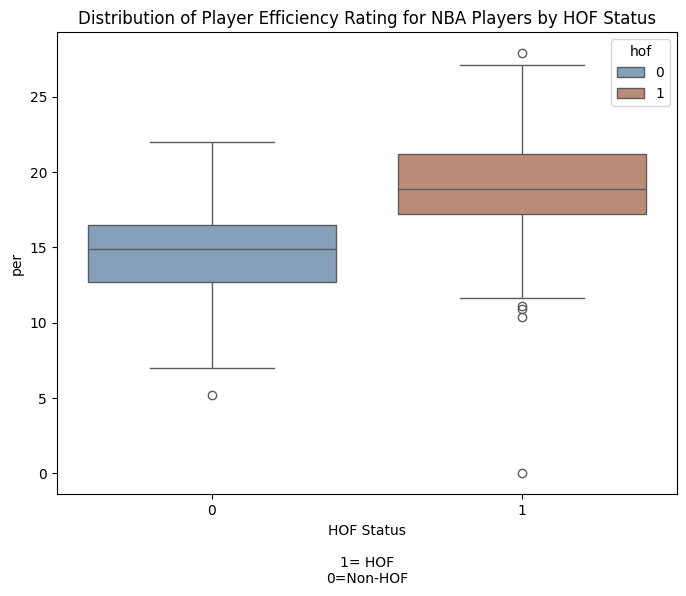

In [93]:
#Make grouped boxplot to analyze the differences by HOF status
sns.boxplot(x='hof', y='per',data=df, hue='hof', palette='twilight_shifted')
plt.title('Distribution of Player Efficiency Rating for NBA Players by HOF Status')
plt.xlabel('HOF Status\n\n1= HOF\n0=Non-HOF')
plt.show()

## Field Goal Percentage

In [96]:
#Check descriptive statistics for each
print('Field Goal % for HOF Players:')
print(hof['fg'].describe())
print('\nField Goal % for Non-HOF Players:')
print(non_hof['fg'].describe())

Field Goal % for HOF Players:
count    154.000000
mean      46.395455
std        5.183538
min       30.200000
25%       43.600000
50%       46.750000
75%       50.275000
max       58.700000
Name: fg, dtype: float64

Field Goal % for Non-HOF Players:
count    406.000000
mean      46.194089
std        4.116881
min       30.400000
25%       43.325000
50%       46.000000
75%       48.900000
max       59.700000
Name: fg, dtype: float64


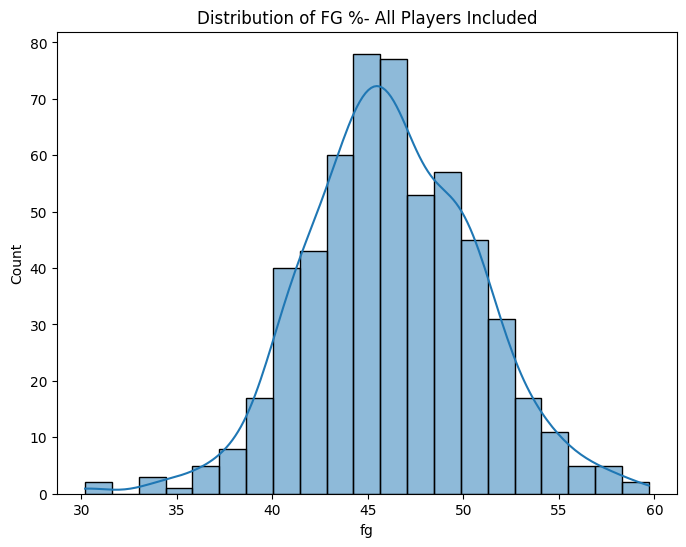

In [97]:
#Check distribution of the data
sns.histplot(x='fg', data=df, kde=True)
plt.title('Distribution of FG %- All Players Included')
plt.show()

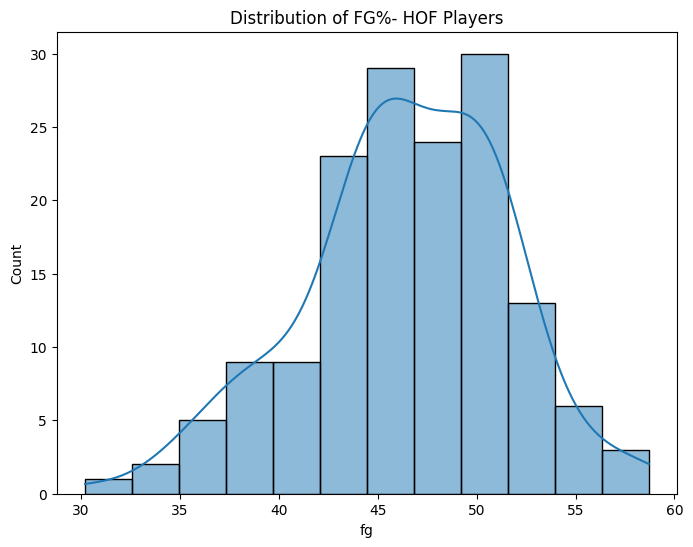

In [99]:
#Check distribution of the data
sns.histplot(x='fg', data=hof, kde=True)
plt.title('Distribution of FG%- HOF Players')
plt.show()

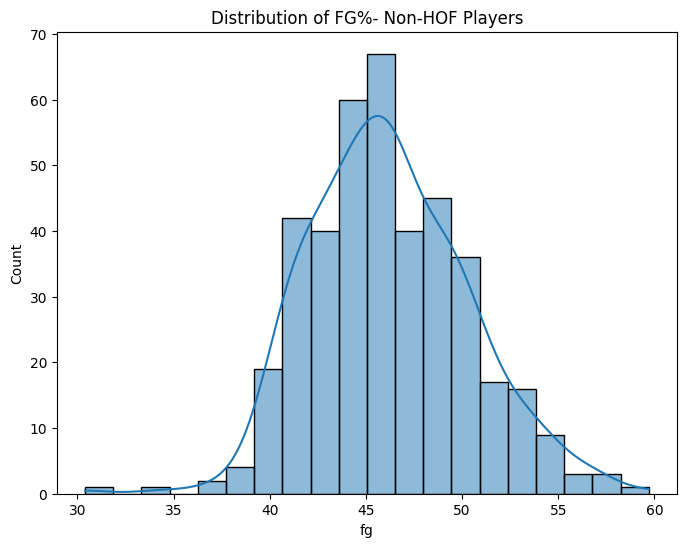

In [101]:
#Check distribution of the data
sns.histplot(x='fg', data=non_hof, kde=True)
plt.title('Distribution of FG%- Non-HOF Players')
plt.show()

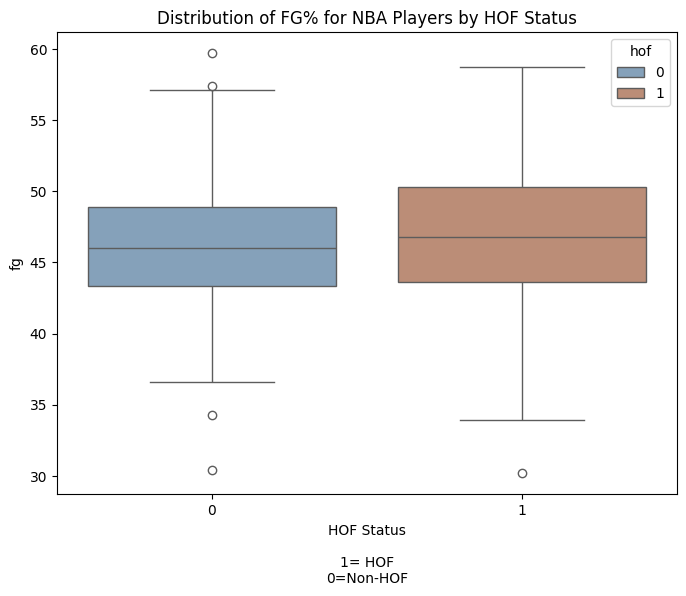

In [102]:
#Make grouped boxplot to analyze the differences by HOF status
sns.boxplot(x='hof', y='fg',data=df, hue='hof', palette='twilight_shifted')
plt.title('Distribution of FG% for NBA Players by HOF Status')
plt.xlabel('HOF Status\n\n1= HOF\n0=Non-HOF')
plt.show()

## Free Throw Percentage

In [103]:
#Check descriptive statistics for each
print('Free Throw % for HOF Players:')
print(hof['ft'].describe())
print('\nFree Throw % for Non-HOF Players:')
print(non_hof['ft'].describe())

Free Throw % for HOF Players:
count    154.000000
mean      76.644805
std        7.625979
min       41.400000
25%       73.525000
50%       77.950000
75%       81.000000
max       90.400000
Name: ft, dtype: float64

Free Throw % for Non-HOF Players:
count    406.000000
mean      74.945074
std        8.422757
min       37.500000
25%       70.900000
50%       76.500000
75%       80.700000
max       90.400000
Name: ft, dtype: float64


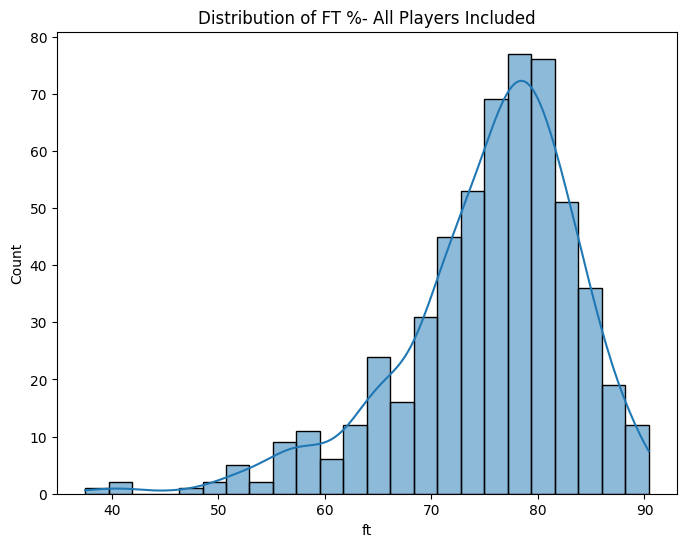

In [105]:
#Check distribution of the data
sns.histplot(x='ft', data=df, kde=True)
plt.title('Distribution of FT %- All Players Included')
plt.show()

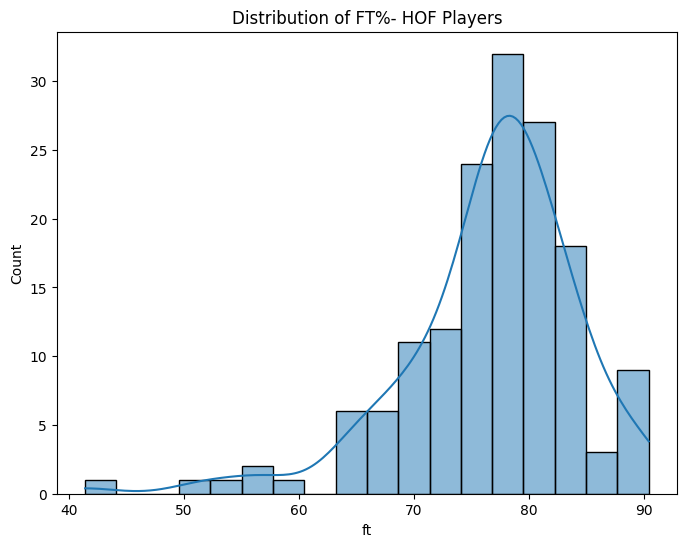

In [106]:
#Check distribution of the data
sns.histplot(x='ft', data=hof, kde=True)
plt.title('Distribution of FT%- HOF Players')
plt.show()

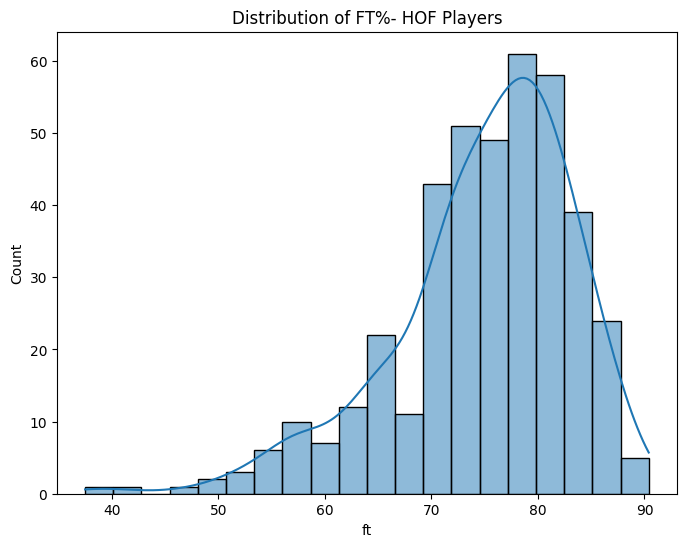

In [107]:
#Check distribution of the data
sns.histplot(x='ft', data=non_hof, kde=True)
plt.title('Distribution of FT%- HOF Players')
plt.show()

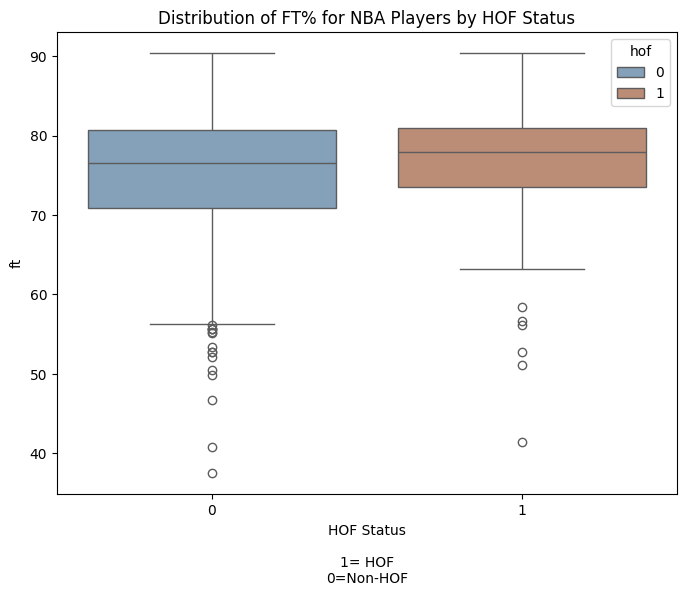

In [108]:
#Make grouped boxplot to analyze the differences by HOF status
sns.boxplot(x='hof', y='ft',data=df, hue='hof', palette='twilight_shifted')
plt.title('Distribution of FT% for NBA Players by HOF Status')
plt.xlabel('HOF Status\n\n1= HOF\n0=Non-HOF')
plt.show()

## Win Shares

In [115]:
#Check descriptive statistics for each
print('Win Shares for HOF Players:')
print(hof['win_shares'].describe())
print('\nWin Shares for Non-HOF Players:')
print(non_hof['win_shares'].describe())

Win Shares for HOF Players:
count    154.000000
mean      99.965584
std       50.168236
min       11.600000
25%       67.950000
50%       91.550000
75%      126.125000
max      273.400000
Name: win_shares, dtype: float64

Win Shares for Non-HOF Players:
count    406.000000
mean      47.409852
std       27.834259
min       -1.600000
25%       23.350000
50%       51.600000
75%       63.850000
max      124.900000
Name: win_shares, dtype: float64


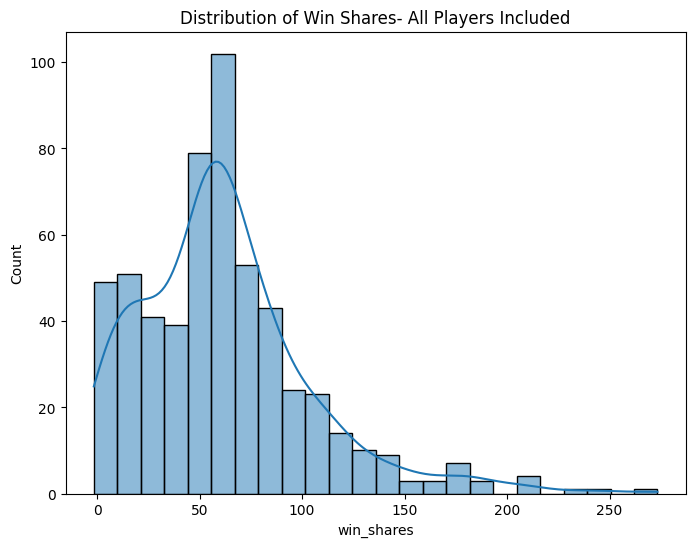

In [112]:
#Check distribution of the data
sns.histplot(x='win_shares', data=df, kde=True)
plt.title('Distribution of Win Shares- All Players Included')
plt.show()

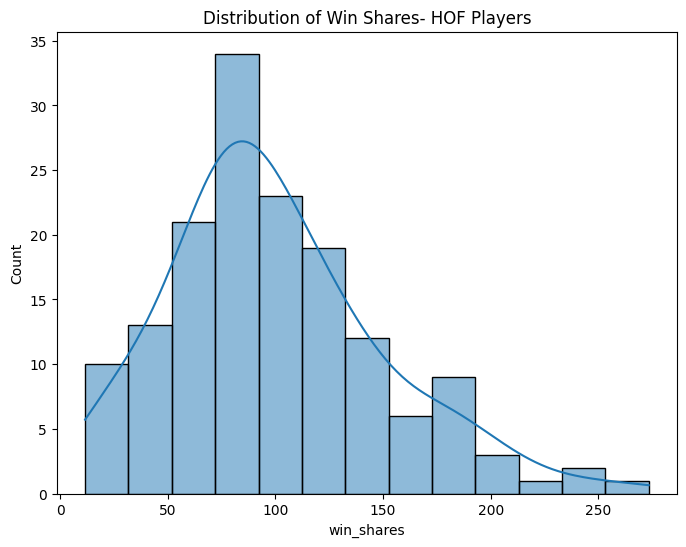

In [113]:
#Check distribution of the data
sns.histplot(x='win_shares', data=hof, kde=True)
plt.title('Distribution of Win Shares- HOF Players')
plt.show()

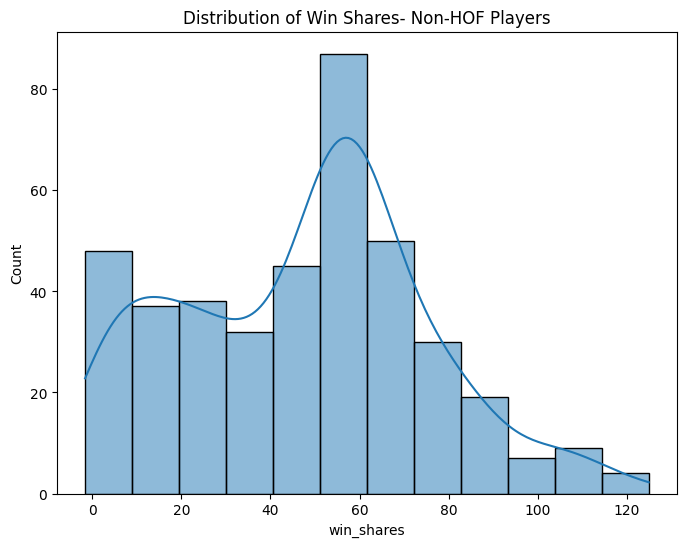

In [114]:
#Check distribution of the data
sns.histplot(x='win_shares', data=non_hof, kde=True)
plt.title('Distribution of Win Shares- Non-HOF Players')
plt.show()

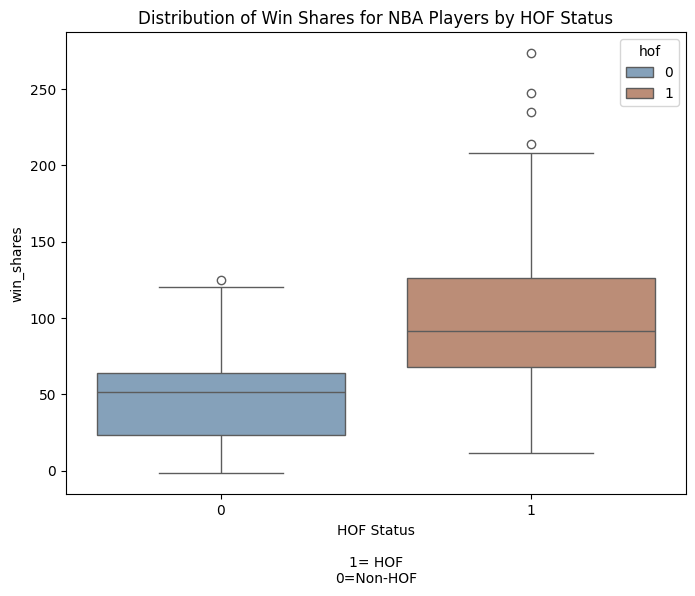

In [116]:
#Make grouped boxplot to analyze the differences by HOF status
sns.boxplot(x='hof', y='win_shares',data=df, hue='hof', palette='twilight_shifted')
plt.title('Distribution of Win Shares for NBA Players by HOF Status')
plt.xlabel('HOF Status\n\n1= HOF\n0=Non-HOF')
plt.show()

## All Star Appearances 

In [15]:
#Check descriptive statistics for each
print('All Star Appearances for HOF Players:')
print(hof['all_stars'].describe())
print('\nAll Star Appearances for Non-HOF Players:')
print(non_hof['all_stars'].describe())

All Star Appearances for HOF Players:
count    154.000000
mean       6.954545
std        4.031479
min        0.000000
25%        5.000000
50%        6.000000
75%       10.000000
max       19.000000
Name: all_stars, dtype: float64

All Star Appearances for Non-HOF Players:
count    406.000000
mean       0.928571
std        1.532309
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: all_stars, dtype: float64


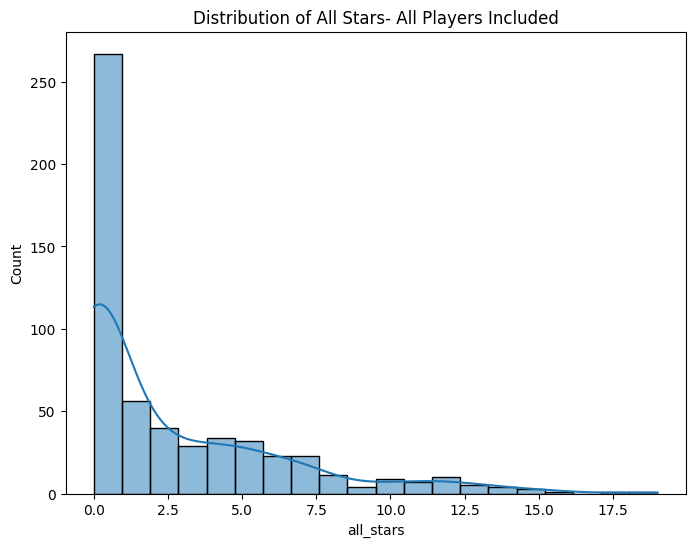

In [123]:
#Check distribution of the data
sns.histplot(x='all_stars', data=df, kde=True)
plt.title('Distribution of All Stars- All Players Included')
plt.show()

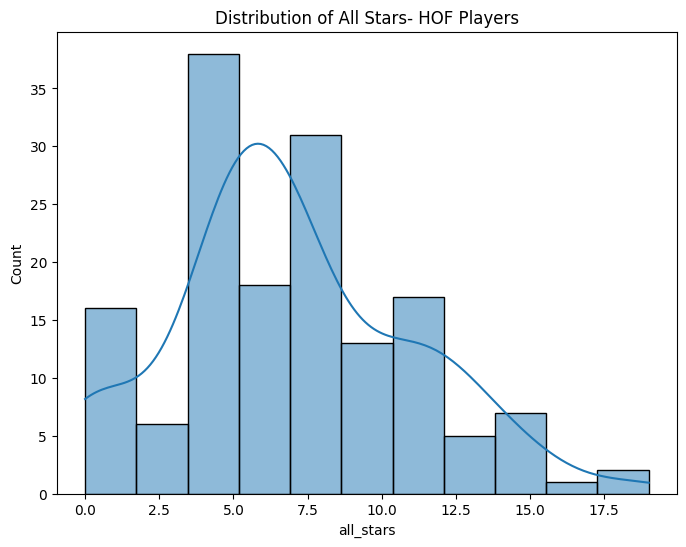

In [124]:
#Check distribution of the data
sns.histplot(x='all_stars', data=hof, kde=True)
plt.title('Distribution of All Stars- HOF Players')
plt.show()

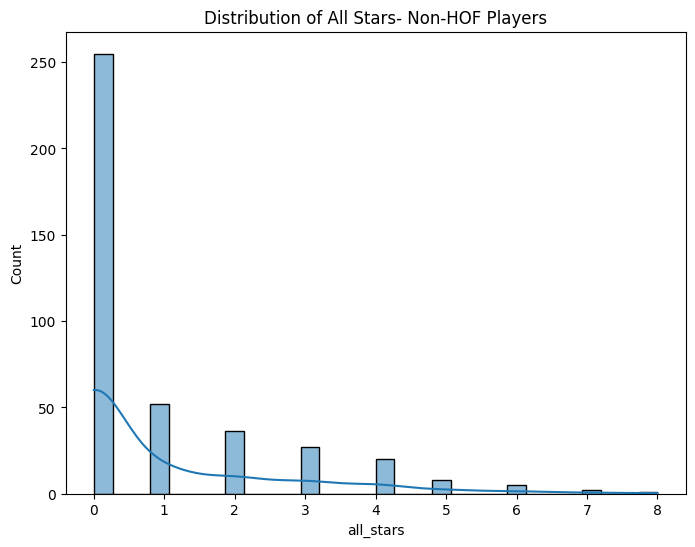

In [125]:
#Check distribution of the data
sns.histplot(x='all_stars', data=non_hof, kde=True)
plt.title('Distribution of All Stars- Non-HOF Players')
plt.show()

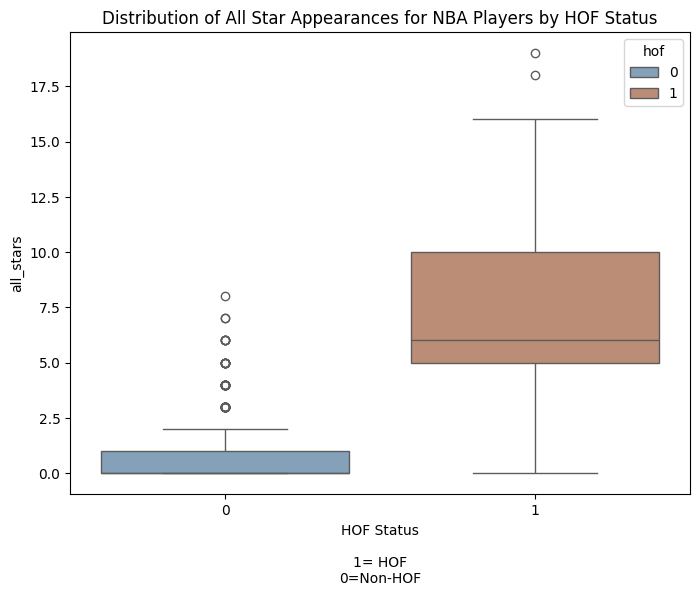

In [16]:
#Make grouped boxplot to analyze the differences by HOF status
sns.boxplot(x='hof', y='all_stars',data=df, hue='hof', palette='twilight_shifted')
plt.title('Distribution of All Star Appearances for NBA Players by HOF Status')
plt.xlabel('HOF Status\n\n1= HOF\n0=Non-HOF')
plt.show()

## All-NBA Awards

In [17]:
#Check descriptive statistics for each
print('All-NBA Awards for HOF Players:')
print(hof['all_nba'].describe())
print('\nAll-NBA Awards for Non-HOF Players:')
print(non_hof['all_nba'].describe())

All-NBA Awards for HOF Players:
count    154.000000
mean       4.454545
std        3.895852
min        0.000000
25%        1.000000
50%        4.000000
75%        6.000000
max       15.000000
Name: all_nba, dtype: float64

All-NBA Awards for Non-HOF Players:
count    406.000000
mean       0.330049
std        0.857463
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        5.000000
Name: all_nba, dtype: float64


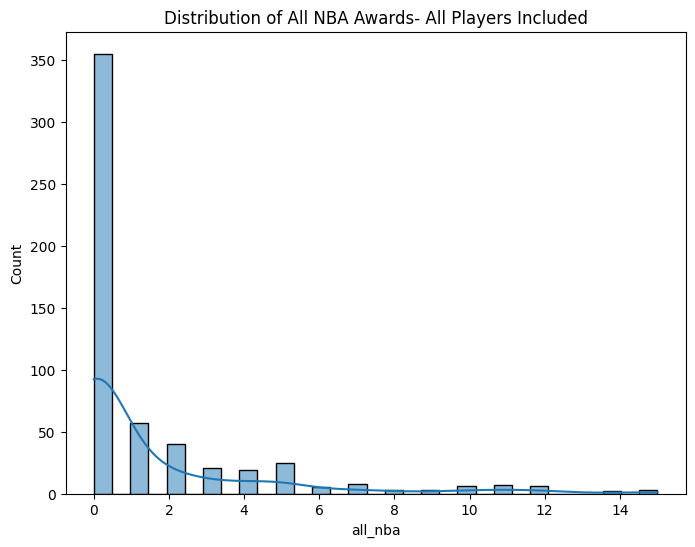

In [20]:
#Check distribution of the data
sns.histplot(x='all_nba', data=df, kde=True)
plt.title('Distribution of All NBA Awards- All Players Included')
plt.show()

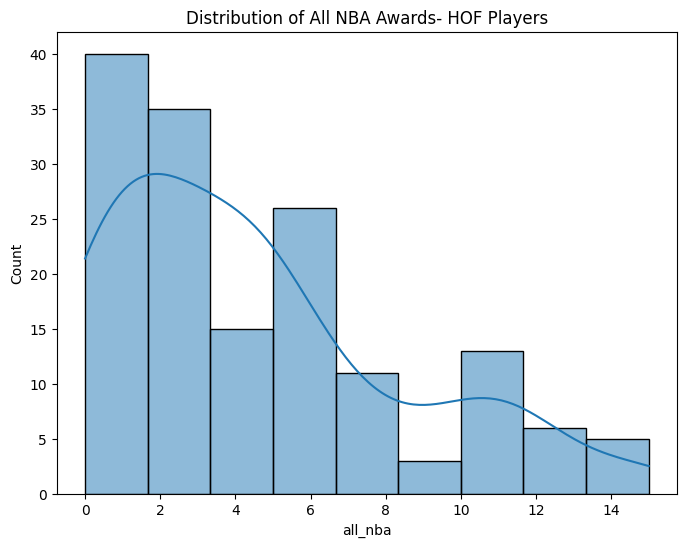

In [21]:
#Check distribution of the data
sns.histplot(x='all_nba', data=hof, kde=True)
plt.title('Distribution of All NBA Awards- HOF Players')
plt.show()

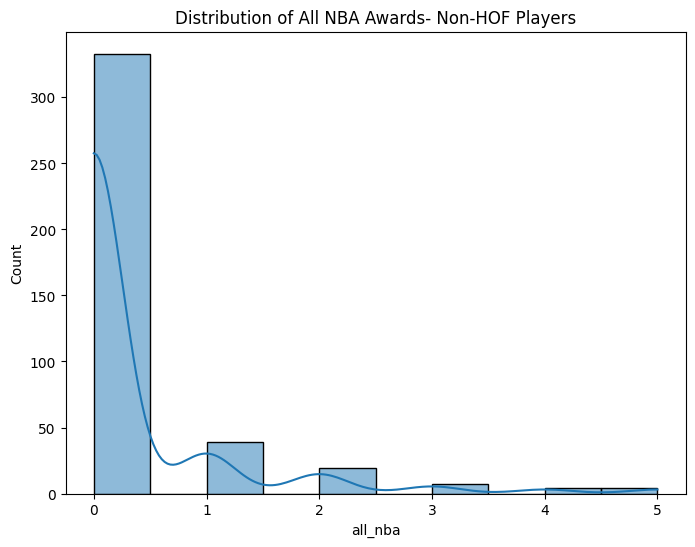

In [22]:
#Check distribution of the data
sns.histplot(x='all_nba', data=non_hof, kde=True)
plt.title('Distribution of All NBA Awards- Non-HOF Players')
plt.show()

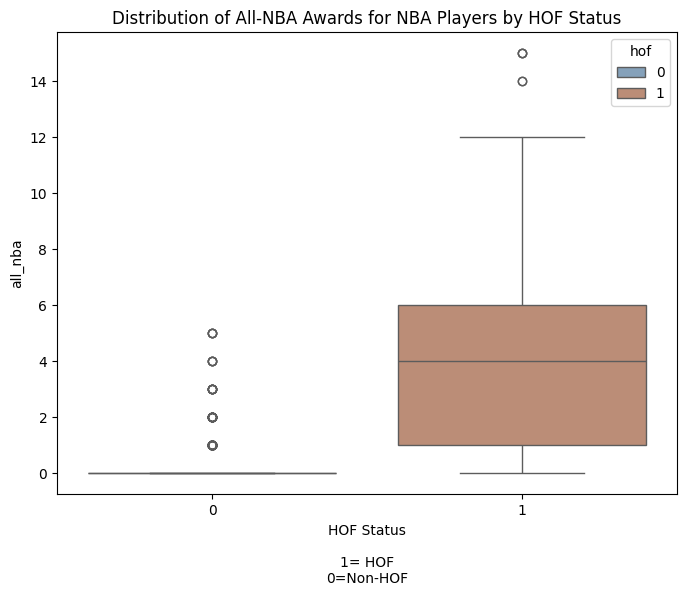

In [28]:
#Make grouped boxplot to analyze the differences by HOF status
sns.boxplot(x='hof', y='all_nba',data=df, hue='hof', palette='twilight_shifted')
plt.title('Distribution of All-NBA Awards for NBA Players by HOF Status')
plt.xlabel('HOF Status\n\n1= HOF\n0=Non-HOF')
plt.show()

## All Defense Team Selections

In [30]:
#Check descriptive statistics for each
print('All-Defense Selections for HOF Players:')
print(hof['all_defense'].describe())
print('\nAll-Defense Selections for Non-HOF Players:')
print(non_hof['all_defense'].describe())

All-Defense Selections for HOF Players:
count    154.000000
mean       1.681818
std        3.204785
min        0.000000
25%        0.000000
50%        0.000000
75%        2.000000
max       15.000000
Name: all_defense, dtype: float64

All-Defense Selections for Non-HOF Players:
count    406.000000
mean       0.376847
std        1.149710
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        8.000000
Name: all_defense, dtype: float64


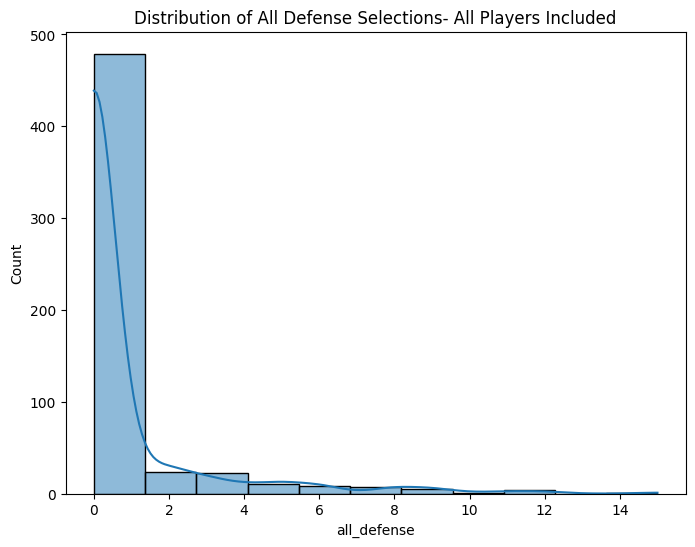

In [31]:
#Check distribution of the data
sns.histplot(x='all_defense', data=df, kde=True)
plt.title('Distribution of All Defense Selections- All Players Included')
plt.show()

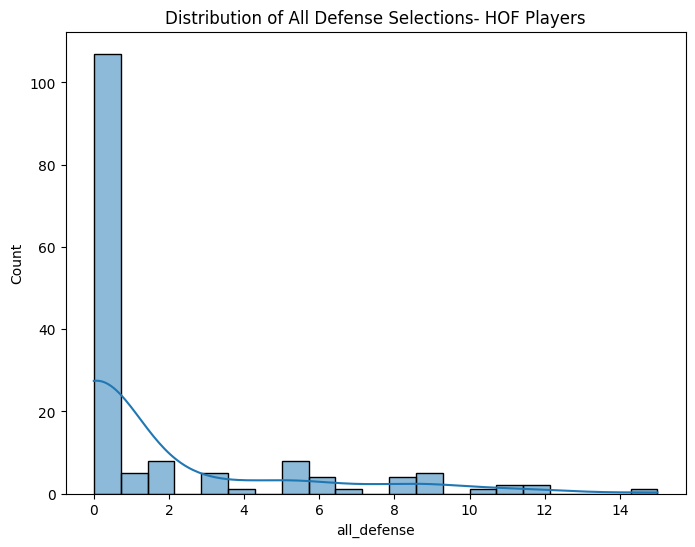

In [32]:
#Check distribution of the data
sns.histplot(x='all_defense', data=hof, kde=True)
plt.title('Distribution of All Defense Selections- HOF Players')
plt.show()

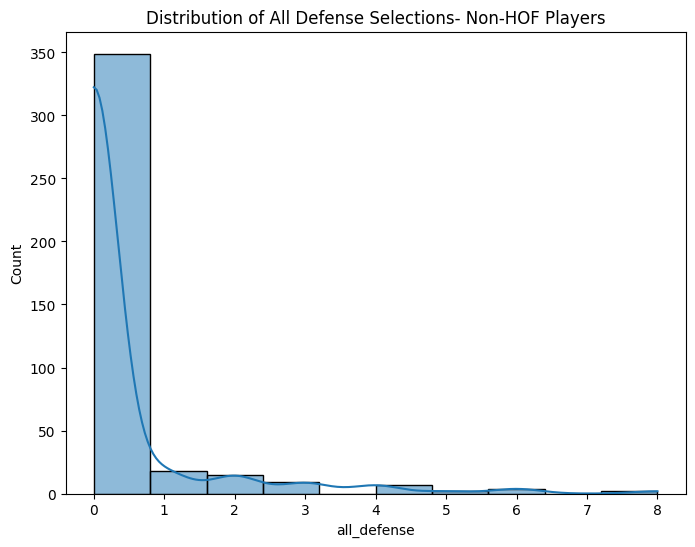

In [33]:
#Check distribution of the data
sns.histplot(x='all_defense', data=non_hof, kde=True)
plt.title('Distribution of All Defense Selections- Non-HOF Players')
plt.show()

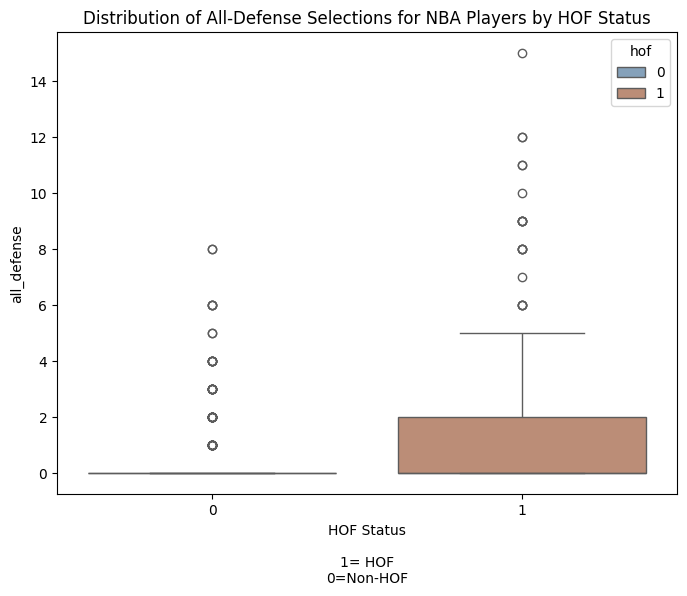

In [34]:
#Make grouped boxplot to analyze the differences by HOF status
sns.boxplot(x='hof', y='all_defense',data=df, hue='hof', palette='twilight_shifted')
plt.title('Distribution of All-Defense Selections for NBA Players by HOF Status')
plt.xlabel('HOF Status\n\n1= HOF\n0=Non-HOF')
plt.show()

In [44]:
#Calculate the number of HOF players with at least 1 all defense selection
hof_all_defense = hof[hof['all_defense'] >= 1].shape[0] / hof.shape[0] * 100

#Display result
print(f"{hof_all_defense:.2f}% of HOF players have at least 1 All-Defense Selection.")

30.52% of HOF players have at least 1 All-Defense Selection.


## All-Rookie Team Selection

In [59]:
#Find the number of HOF players that've made the All-Rookie Team
hof_rookie_team = hof[hof['rookie_team'] == 1].shape[0] / hof.shape[0] * 100
print(f"{hof_rookie_team:.2f}% of HOF players have made the All-Rookie Team.")

53.90% of HOF players have made the All-Rookie Team.


In [ ]:
#Find HOF Players that didn't make their all-rookie team
list(hof[hof['rookie_team'] == 0]['name'])

['Jerry West',
 'Dick Barnett',
 'Chauncey Billups',
 'Michael Cooper',
 'Dirk Nowitzki',
 'Ben Wallace',
 'Carl Braun',
 'Chuck Cooper',
 'Sidney Moncrief',
 'Paul Westphal',
 'Maurice Cheeks',
 'Steve Nash',
 'Tracy McGrady',
 'Šarūnas Marčiulionis',
 'Guy Rodgers',
 'Roger Brown',
 'Richie Guerin',
 'Reggie Miller',
 'Chris Mullin',
 'Dennis Rodman',
 'Dennis Johnson',
 'Scottie Pippen',
 'John Stockton',
 'Clyde Drexler',
 'Maurice Stokes',
 'Robert Parish',
 'Dražen Petrović',
 'Arnie Risen',
 'Alex English',
 'Bailey Howell',
 'Gail Goodrich',
 'George Yardley',
 'Vern Mikkelsen',
 'Walt Bellamy',
 'Dick McGuire',
 'Bill Walton',
 'Connie Hawkins',
 'Tiny Archibald',
 'Harry Gallatin',
 'Neil Johnston',
 'Buddy Jeannette',
 'K.C. Jones',
 'Lenny Wilkens',
 'Clyde Lovellette',
 'Bob Houbregs',
 'Bobby Wanzer',
 'Tom Heinsohn',
 'Al Cervi',
 'Sam Jones',
 'Bill Bradley',
 'Jack Twyman',
 'Hal Greer',
 'Slater Martin',
 'Frank Ramsey',
 'Oscar Robertson',
 'Wilt Chamberlain',
 'Paul

C:\Users\KRAyu\AppData\Local\Temp\ipykernel_164\480154811.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.barplot(x='hof', y='proportion', data=all_rookie_proportion, palette='twilight_shifted')


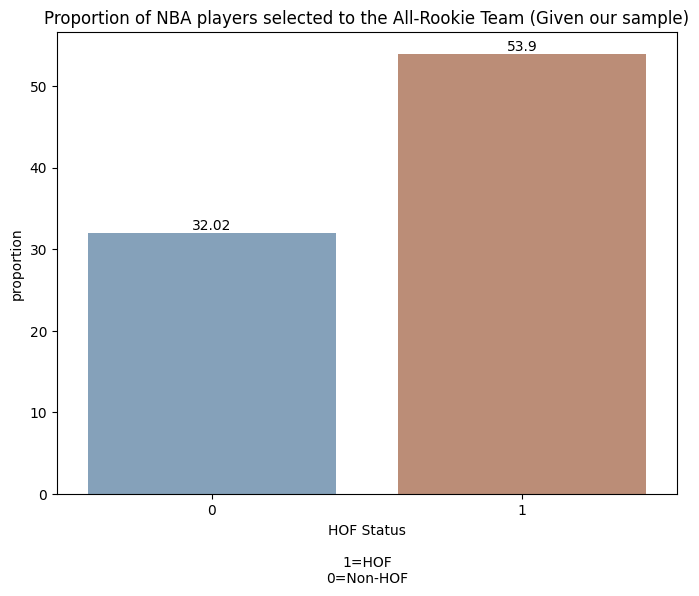

In [69]:
#Get proportion of our sample that've made a all-rookie team given their HOF status
all_rookie_proportion = df.groupby('hof')['rookie_team'].mean().reset_index(name='proportion')
all_rookie_proportion['proportion'] = round(all_rookie_proportion['proportion'] * 100, 2)

#Visualize result
plot = sns.barplot(x='hof', y='proportion', data=all_rookie_proportion, palette='twilight_shifted')

#Annotate
plt.title('Proportion of NBA players selected to the All-Rookie Team (Given our sample)')
plt.xlabel('HOF Status\n\n1=HOF\n0=Non-HOF')
for i in plot.containers:
    plot.bar_label(i, )

#Display
plt.show()

Although the difference is pretty outstanding, and half of Hall of Famers did in fact make their All-Rookie team, given some of the hall of famers who didn't make their all-rookie team, this feature might not have that much impact or importance. 

## MVP Awards (Most Valuable Player of the Year)

In [ ]:
#Check descriptive statistics for each
print('MVP Awards for HOF Players:')
print(hof['mvps'].describe())
print('\nMVP Awards for Non-HOF Players:')
print(non_hof['mvps'].describe())

MVP Awards for HOF Players:
count    154.000000
mean       0.409091
std        1.020148
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: mvps, dtype: float64

MVP Awards for Non-HOF Players:
count    406.000000
mean       0.002463
std        0.049629
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: mvps, dtype: float64


In [ ]:
#Find Non-HOF player with a mvp award
non_hof[non_hof['mvps'] == 1]['name']

159    Derrick Rose
Name: name, dtype: object

Derrick Rose is the 1 Non-HOF player in our sample with a MVP award. In the real world (All Non-HOF Players), there might be more to have MVP awards but I would say this is pretty accurate. 

In [79]:
#Find percentage of NBA players with atleast 1 MVP award
hof_mvps = hof[hof['mvps'] >= 1].shape[0] / hof.shape[0] * 100
print(f"{hof_mvps:.2f}% of Hall of Fame players have at least 1 MVP award.")

21.43% of Hall of Fame players have at least 1 MVP award.


Since 21.43% of HOF's have at least 1 mvp award, this makes this award very rare for NBA players. 

In [83]:
#Get a list of players with at least 1 mvp award
list(hof[hof['mvps'] >= 1]['name'])

['Dirk Nowitzki',
 'Kobe Bryant',
 'Tim Duncan',
 'Kevin Garnett',
 'Steve Nash',
 'George McGinnis',
 'Allen Iverson',
 "Shaquille O'Neal",
 'Spencer Haywood',
 'Mel Daniels',
 'Artis Gilmore',
 'Karl Malone',
 'Michael Jordan',
 'David Robinson',
 'Hakeem Olajuwon',
 'Charles Barkley',
 'Magic Johnson',
 'Moses Malone',
 'Bob McAdoo',
 'Larry Bird',
 'Kareem Abdul-Jabbar',
 'Julius Erving',
 'Bill Walton',
 'Connie Hawkins',
 'Dave Cowens',
 'Wes Unseld',
 'Billy Cunningham',
 'Willis Reed',
 'Oscar Robertson',
 'Wilt Chamberlain',
 'Bill Russell',
 'Bob Cousy',
 'Bob Pettit']

In [ ]:
#Display players with more than 1 mvp award
hof[hof['mvps'] > 1][['name', 'mvps']]

,name,mvps
20,Tim Duncan,2
33,Steve Nash,2
54,Mel Daniels,2
65,Karl Malone,2
67,Michael Jordan,5
80,Magic Johnson,3
82,Moses Malone,3
86,Larry Bird,3
94,Kareem Abdul-Jabbar,6
97,Julius Erving,4


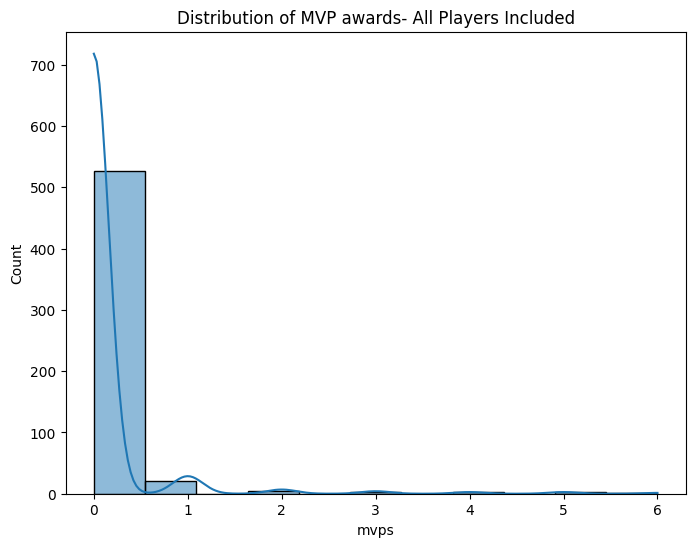

In [87]:
#Check distribution of the data
sns.histplot(x='mvps', data=df, kde=True)
plt.title('Distribution of MVP awards- All Players Included')
plt.show()

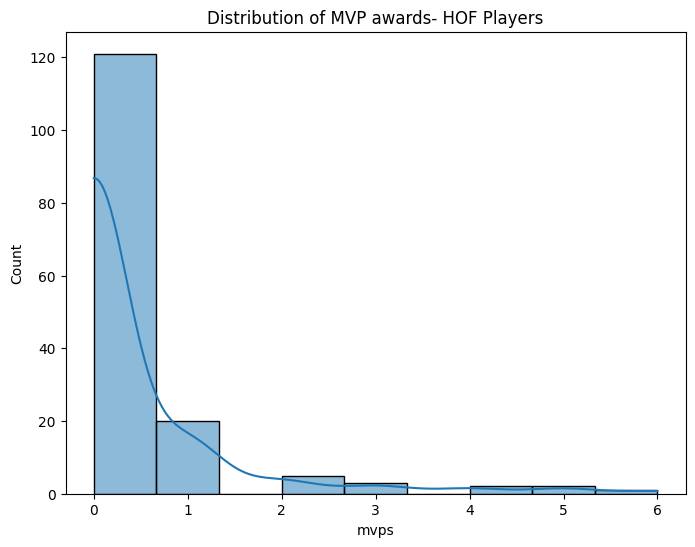

In [89]:
#Check distribution of the data
sns.histplot(x='mvps', data=hof, kde=True)
plt.title('Distribution of MVP awards- HOF Players')
plt.show()

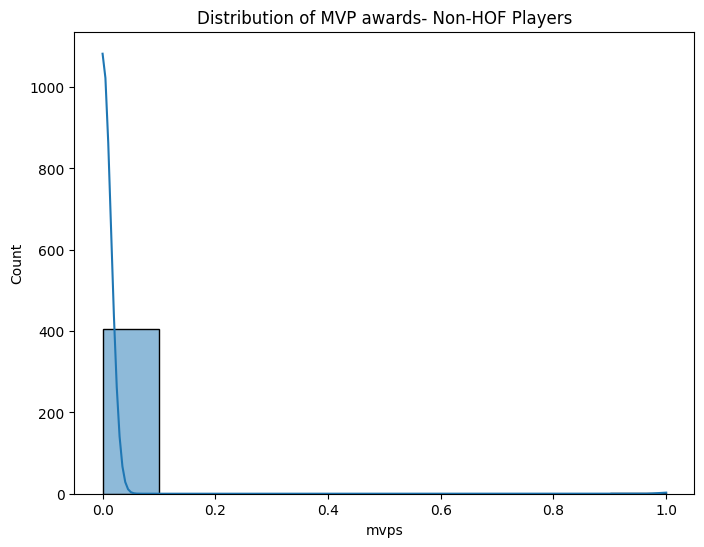

In [90]:
#Check distribution of the data
sns.histplot(x='mvps', data=non_hof, kde=True)
plt.title('Distribution of MVP awards- Non-HOF Players')
plt.show()

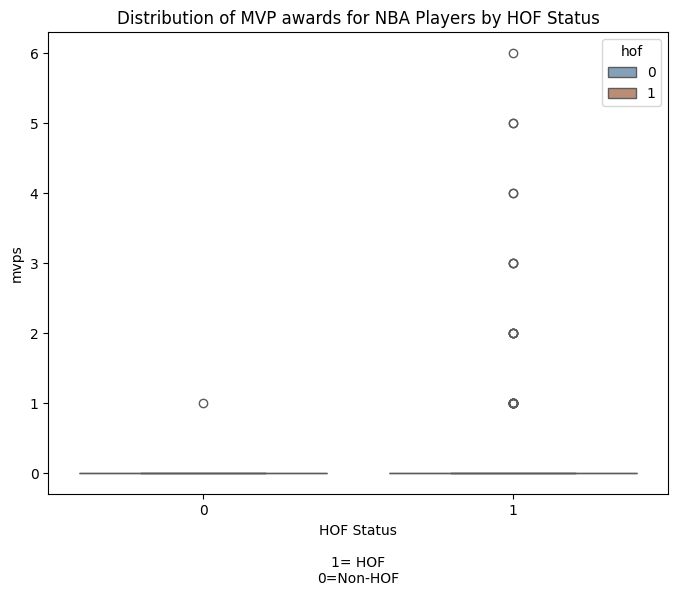

In [91]:
#Make grouped boxplot to analyze the differences by HOF status
sns.boxplot(x='hof', y='mvps',data=df, hue='hof', palette='twilight_shifted')
plt.title('Distribution of MVP awards for NBA Players by HOF Status')
plt.xlabel('HOF Status\n\n1= HOF\n0=Non-HOF')
plt.show()

This is a very rare award to have, even for HOF players, regardless I think this still might be a useful feature given that Non-HOF players haven't achieved this award, despite Derrick Rose and currently active players such as Lebron, Nikola Jokic, Kevin Durant, and Stephen Curry.

Citation: https://www.statmuse.com/nba/ask/nba-players-with-an-mvp-award-not-in-the-hall-of-fame

## NBA Championships

In [93]:
#Check descriptive statistics for each
print('NBA Championships for HOF Players:')
print(hof['chips'].describe())
print('\nNBA Championships for Non-HOF Players:')
print(non_hof['chips'].describe())

NBA Championships for HOF Players:
count    154.000000
mean       1.714286
std        2.119669
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max       11.000000
Name: chips, dtype: float64

NBA Championships for Non-HOF Players:
count    406.000000
mean       0.507389
std        0.952551
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        7.000000
Name: chips, dtype: float64


In [95]:
#Find the % of HOF players with atleast 1 championship
hof_chips = hof[hof['chips'] >= 1].shape[0] / hof.shape[0] * 100
print(f"{hof_chips:.2f}% of Hall of Fame Players have at least 1 NBA Championship.")

67.53% of Hall of Fame Players have at least 1 NBA Championship.


In [100]:
#Find how many HOF Players never won a single NBA Championship
hof_no_chips = hof[hof['chips'] == 0].shape[0]
print(f"{hof_no_chips} Hall of Fame Players never won a single NBA Championship")

50 Hall of Fame Players never won a single NBA Championship


In [98]:
#Get a list of HOF's without a NBA Champinoship
list(hof[hof['chips'] == 0]['name'])

['Vince Carter',
 'Walter Davis',
 'Tim Hardaway',
 'Lou Hudson',
 'Chris Webber',
 'Chuck Cooper',
 'Vlade Divac',
 'Sidney Moncrief',
 'Grant Hill',
 'Steve Nash',
 'Dino Radja',
 'Tracy McGrady',
 'Allen Iverson',
 'Yao Ming',
 'Dikembe Mutombo',
 'Šarūnas Marčiulionis',
 'Guy Rodgers',
 'Richie Guerin',
 'Bernard King',
 'Reggie Miller',
 'Ralph Sampson',
 'Chris Mullin',
 'Arvydas Sabonis',
 'Karl Malone',
 'John Stockton',
 'Adrian Dantley',
 'Patrick Ewing',
 'Charles Barkley',
 'Dominique Wilkins',
 'Maurice Stokes',
 'Dražen Petrović',
 'Alex English',
 'George Gervin',
 'David Thompson',
 'George Yardley',
 'Walt Bellamy',
 'Dick McGuire',
 'Calvin Murphy',
 'Bob Lanier',
 'Harry Gallatin',
 'Dave Bing',
 'Buddy Jeannette',
 'Lenny Wilkens',
 'Bob Houbregs',
 'Pete Maravich',
 'Al Cervi',
 'Nate Thurmond',
 'Jack Twyman',
 'Elgin Baylor',
 'Carmelo Anthony']

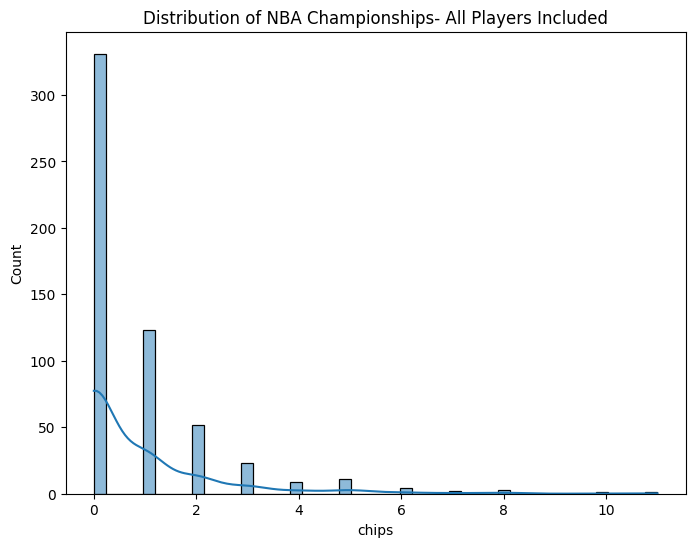

In [106]:
#Check distribution of the data
sns.histplot(x='chips', data=df, kde=True)
plt.title('Distribution of NBA Championships- All Players Included')
plt.show()

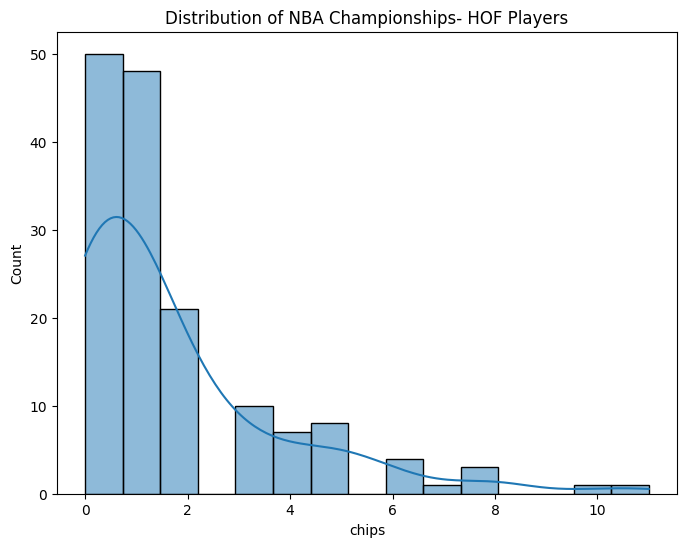

In [107]:
#Check distribution of the data
sns.histplot(x='chips', data=hof, kde=True)
plt.title('Distribution of NBA Championships- HOF Players')
plt.show()

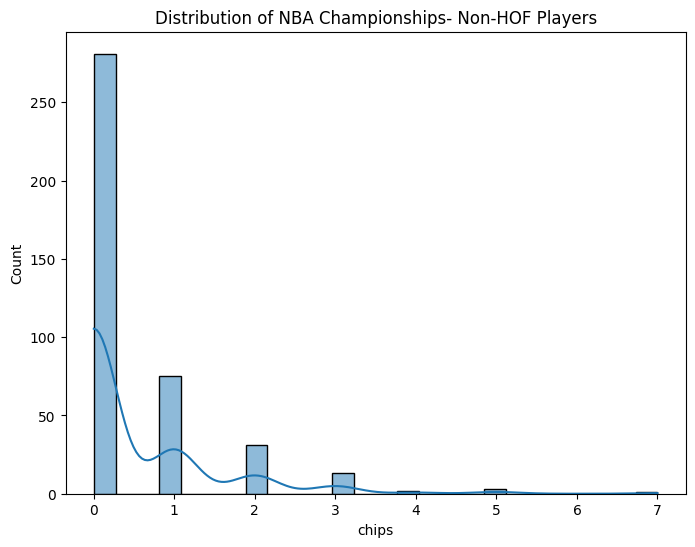

In [108]:
#Check distribution of the data
sns.histplot(x='chips', data=non_hof, kde=True)
plt.title('Distribution of NBA Championships- Non-HOF Players')
plt.show()

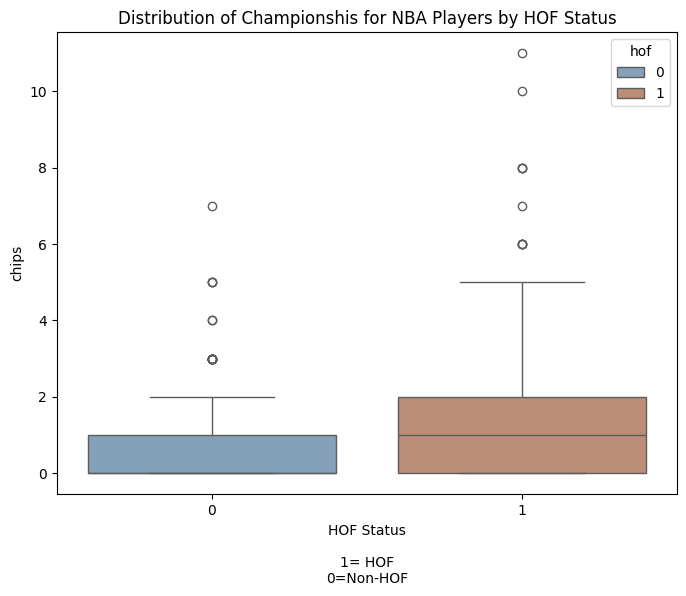

In [109]:
#Make grouped boxplot to analyze the differences by HOF status
sns.boxplot(x='hof', y='chips',data=df, hue='hof', palette='twilight_shifted')
plt.title('Distribution of Championshis for NBA Players by HOF Status')
plt.xlabel('HOF Status\n\n1= HOF\n0=Non-HOF')
plt.show()

## Rookie of The Year Award

In [13]:
#Find percentage of Hall of Famers who've won the Rookie of the Year award
hof_roy = hof[hof['roy'] == 1].shape[0] / hof.shape[0] * 100
print(f"{hof_roy:.2f}% of NBA Hall of Famers have won the Rookie of the Year award.")

26.62% of NBA Hall of Famers have won the Rookie of the Year award.


In [15]:
#Get a list of hall of famers who've won the Rookie of the Year award
print('Hall of Famers who won the rookie of the year award:')
print(hof[hof['roy'] == 1].shape[0], 'out of 154 HOF players won the ROY award.')
list(hof[hof['roy'] == 1]['name'])

Hall of Famers who won the rookie of the year award:
41 out of 154 HOF players won the ROY award.


['Vince Carter',
 'Walter Davis',
 'Pau Gasol',
 'Lou Hudson',
 'Chris Webber',
 'Tim Duncan',
 'Grant Hill',
 'Jason Kidd',
 'Charlie Scott',
 'Allen Iverson',
 "Shaquille O'Neal",
 'Spencer Haywood',
 'Mitch Richmond',
 'Mel Daniels',
 'Ralph Sampson',
 'Jamaal Wilkes',
 'Artis Gilmore',
 'Michael Jordan',
 'David Robinson',
 'Adrian Dantley',
 'Patrick Ewing',
 'Maurice Stokes',
 'Bob McAdoo',
 'Larry Bird',
 'David Thompson',
 'Kareem Abdul-Jabbar',
 'Walt Bellamy',
 'Dan Issel',
 'Dave Cowens',
 'Dave Bing',
 'Earl Monroe',
 'Wes Unseld',
 'Rick Barry',
 'Tom Heinsohn',
 'Willis Reed',
 'Jerry Lucas',
 'Oscar Robertson',
 'Wilt Chamberlain',
 'Paul Arizin',
 'Elgin Baylor',
 'Bob Pettit']

In [17]:
#Get a list of hall of famers who've won the Rookie of the Year award
print("Hall of Famers who won didn't the rookie of the year award:")
print(hof[hof['roy'] == 0].shape[0], "out of 154 HOF players didn't win the ROY award their rookie season")
list(hof[hof['roy'] == 0]['name'])

Hall of Famers who won didn't the rookie of the year award:
113 out of 154 HOF players didn't win the ROY award their rookie season


['Jerry West',
 'Dick Barnett',
 'Chauncey Billups',
 'Michael Cooper',
 'Dirk Nowitzki',
 'Tony Parker',
 'Dwyane Wade',
 'Manu Ginóbili',
 'Tim Hardaway',
 'Chris Bosh',
 'Bob Dandridge',
 'Toni Kukoč',
 'Paul Pierce',
 'Ben Wallace',
 'Kobe Bryant',
 'Kevin Garnett',
 'Carl Braun',
 'Chuck Cooper',
 'Vlade Divac',
 'Bobby Jones',
 'Sidney Moncrief',
 'Jack Sikma',
 'Paul Westphal',
 'Ray Allen',
 'Maurice Cheeks',
 'Steve Nash',
 'Dino Radja',
 'George McGinnis',
 'Tracy McGrady',
 'Zelmo Beaty',
 'Yao Ming',
 'Louie Dampier',
 'Dikembe Mutombo',
 'Jo Jo White',
 'Šarūnas Marčiulionis',
 'Alonzo Mourning',
 'Guy Rodgers',
 'Roger Brown',
 'Richie Guerin',
 'Bernard King',
 'Gary Payton',
 'Reggie Miller',
 'Chet Walker',
 'Chris Mullin',
 'Dennis Rodman',
 'Arvydas Sabonis',
 'Dennis Johnson',
 'Gus Johnson',
 'Karl Malone',
 'Scottie Pippen',
 'John Stockton',
 'Hakeem Olajuwon',
 'Charles Barkley',
 'Joe Dumars',
 'Dominique Wilkins',
 'Clyde Drexler',
 'Robert Parish',
 'James Wo

In [19]:
#Find number of ROY winners for non hall of fame players in our sample
print(non_hof[non_hof['roy'] == 1].shape[0], "of the Non-HOF players in our sample won the Rookie of the Year Award.\nWinners:")

#Display the non-hof players who won the award
list(non_hof[non_hof['roy'] == 1]['name'])

17 of the Non-HOF players in our sample won the Rookie of the Year Award.
Winners:


['Derrick Rose',
 "Amar'e Stoudemire",
 'Elton Brand',
 'Brandon Roy',
 'Buck Williams',
 'Terry Cummings',
 'Warren Jabali',
 'Larry Kenon',
 'Blake Griffin',
 'Larry Johnson',
 'Derrick Coleman',
 'Alvan Adams',
 'Mike Miller',
 'Swen Nater',
 'Terry Dischinger',
 'Damon Stoudamire',
 'Steve Francis']

C:\Users\KRAyu\AppData\Local\Temp\ipykernel_22504\2447721634.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.barplot(x='roy', y='proportion', data=roy_proportion, palette='twilight_shifted')


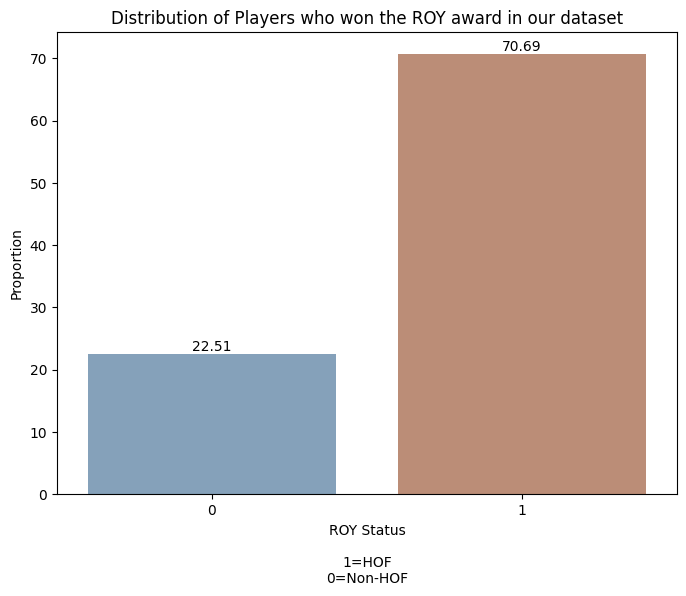

In [23]:
#Get proportion for each group
roy_proportion = df.groupby('roy')['hof'].mean().reset_index(name='proportion')
roy_proportion['proportion'] = round(roy_proportion['proportion'] * 100, 2)

#Display
plot = sns.barplot(x='roy', y='proportion', data=roy_proportion, palette='twilight_shifted')

#Annotate
plt.title('Distribution of Players who won the ROY award in our dataset')
plt.xlabel('ROY Status\n\n1=HOF\n0=Non-HOF')
plt.ylabel('Proportion')
for i in plot.containers:
    plot.bar_label(i, )
    
#Display
plt.show()

In our dataset around 70% of players who on the Rookie of the Year award were in the hall of fame, while 22% who won the award aren't in the HOF. 

While this may not be a perfect reflection of the real world, it's still a good representation of how hard it is to win the rookie of the year award and the fact the most winners (atleast given our dataset) are in the HOF. 

Overall, winning rookie of the year is a pretty diffucult award, even for HOF players, since only about 26% of HOF'ers have won (41 out of 154 inducted players).

## Defensive Player of the Year Awards

In [27]:
#Check descriptive statistics for each
print('Defensive Player of the Year Awards for HOF Players:')
print(hof['dpoys'].describe())
print('\nDefensive Player of the Year Awards for Non-HOF Players:')
print(non_hof['dpoys'].describe())

Defensive Player of the Year Awards for HOF Players:
count    154.000000
mean       0.155844
std        0.617076
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        4.000000
Name: dpoys, dtype: float64

Defensive Player of the Year Awards for Non-HOF Players:
count    406.000000
mean       0.019704
std        0.155891
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        2.000000
Name: dpoys, dtype: float64


In [46]:
#Find the % of HOF players with atleast 1 defensive player of the year award
hof_chips = hof[hof['dpoys'] >= 1].shape[0] / hof.shape[0] * 100
print(f"{hof_chips:.2f}% of Hall of Fame Players have at least 1 Defensive Player of the Year Award.\nHOF players with atleast 1 DPOY award:")

#Display players with at least 1 
display(hof[hof['dpoys'] >= 1][['name','dpoys']].sort_values(by='dpoys', ascending=False))

7.79% of Hall of Fame Players have at least 1 Defensive Player of the Year Award.
HOF players with atleast 1 DPOY award:


,name,dpoys
17,Ben Wallace,4
44,Dikembe Mutombo,4
155,Dwight Howard,3
26,Sidney Moncrief,2
72,Hakeem Olajuwon,2
47,Alonzo Mourning,2
61,Dennis Rodman,2
4,Michael Cooper,1
21,Kevin Garnett,1
53,Gary Payton,1


In [34]:
#Find how many HOF Players never won a single NBA Championship
hof_no_dpoys = hof[hof['dpoys'] == 0].shape[0]
print(f"{hof_no_dpoys} out of 154 Hall of Fame Players never won a Defensive Player of the Year Award.")

142 out of 154 Hall of Fame Players never won a Defensive Player of the Year Award.


In [47]:
#Find non-hof players who've won defensive player of the year in our dataset/sample
print("Non-HOF Players in our dataset who've won at least 1 Defensive Player of the Year Award:")
non_hof[non_hof['dpoys'] >= 1][['name', 'dpoys']].sort_values(by='dpoys', ascending=False)

Non-HOF Players in our dataset who've won at least 1 Defensive Player of the Year Award:


,name,dpoys
198,Mark Eaton,2
182,Alvin Robertson,1
166,Tyson Chandler,1
188,Marc Gasol,1
203,Joakim Noah,1
215,Metta World Peace,1
220,Marcus Camby,1


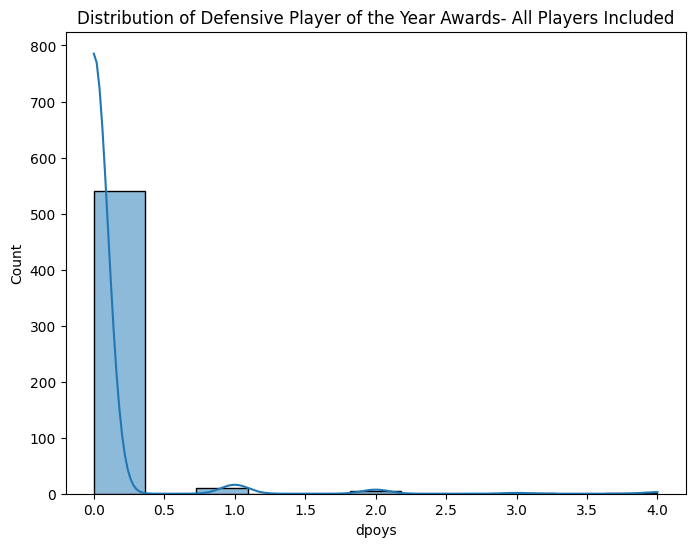

In [36]:
#Check distribution of the data
sns.histplot(x='dpoys', data=df, kde=True)
plt.title('Distribution of Defensive Player of the Year Awards- All Players Included')
plt.show()

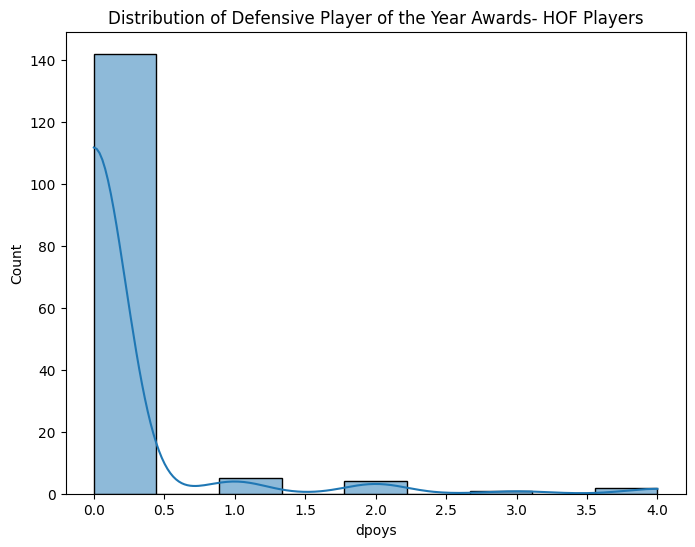

In [37]:
#Check distribution of the data
sns.histplot(x='dpoys', data=hof, kde=True)
plt.title('Distribution of Defensive Player of the Year Awards- HOF Players')
plt.show()

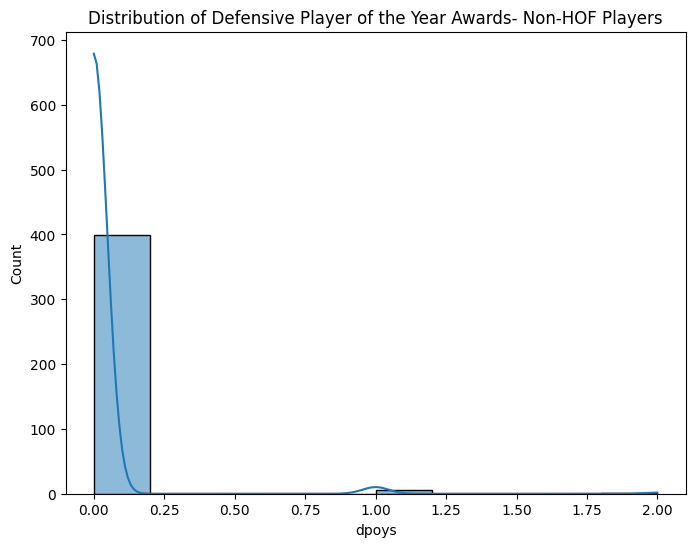

In [38]:
#Check distribution of the data
sns.histplot(x='dpoys', data=non_hof, kde=True)
plt.title('Distribution of Defensive Player of the Year Awards- Non-HOF Players')
plt.show()

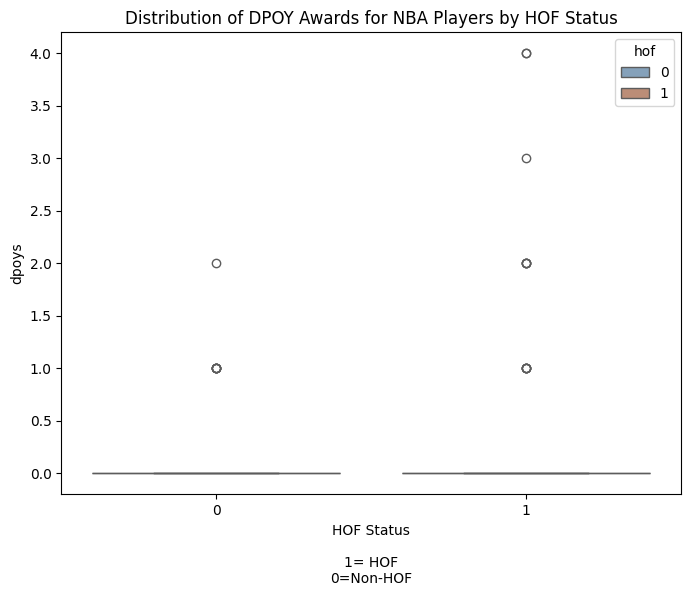

In [39]:
#Make grouped boxplot to analyze the differences by HOF status
sns.boxplot(x='hof', y='dpoys',data=df, hue='hof', palette='twilight_shifted')
plt.title('Distribution of DPOY Awards for NBA Players by HOF Status')
plt.xlabel('HOF Status\n\n1= HOF\n0=Non-HOF')
plt.show()

This is a extremely rare award, even if you've made it to the HOF. Im not completely sure how this'll fit into the model. 

## Scoring Championships

In [42]:
#Check descriptive statistics for each
print('Scoring Championships for HOF Players:')
print(hof['scoring_champ'].describe())
print('\nScoring Championships for Non-HOF Players:')
print(non_hof['scoring_champ'].describe())

Scoring Championships for HOF Players:
count    154.000000
mean       0.402597
std        1.212783
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max       10.000000
Name: scoring_champ, dtype: float64

Scoring Championships for Non-HOF Players:
count    406.000000
mean       0.002463
std        0.049629
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: scoring_champ, dtype: float64


In [45]:
#Find the % of HOF players with atleast 1 defensive player of the year award
hof_sc = hof[hof['scoring_champ'] >= 1].shape[0] / hof.shape[0] * 100
print(f"{hof_sc:.2f}% of Hall of Fame Players have at least 1 Scoring Championship.\nHOF players with atleast 1 Scoring Championship award:")

#Display players with at least 1 
display(hof[hof['scoring_champ'] >= 1][['name','scoring_champ']].sort_values(by='scoring_champ', ascending=False))

18.18% of Hall of Fame Players have at least 1 Scoring Championship.
HOF players with atleast 1 Scoring Championship award:


,name,scoring_champ
67,Michael Jordan,10
136,Wilt Chamberlain,7
90,George Gervin,4
39,Allen Iverson,4
109,Neil Johnston,3
151,George Mikan,3
83,Bob McAdoo,3
137,Paul Arizin,2
70,Adrian Dantley,2
41,Shaquille O'Neal,2


In [49]:
#Find non-hof players in our dataset with a scoring championship
non_hof[non_hof['scoring_champ'] >= 1][['name', 'scoring_champ']]

,name,scoring_champ
179,Max Zaslofsky,1


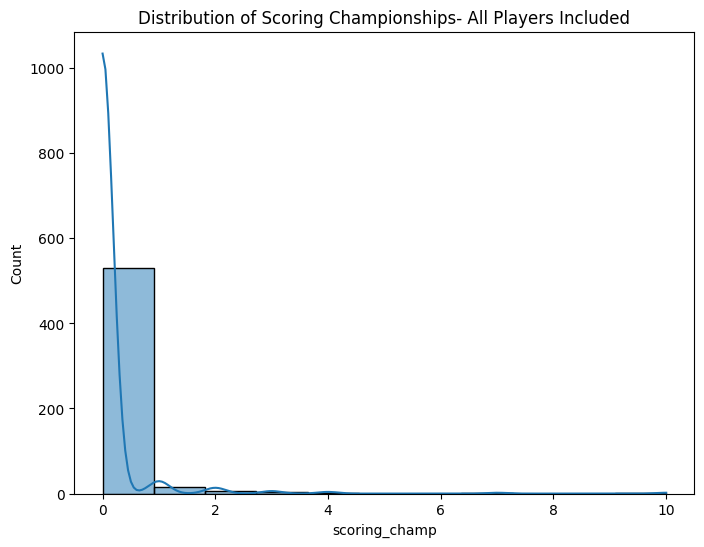

In [50]:
#Check distribution of the data
sns.histplot(x='scoring_champ', data=df, kde=True)
plt.title('Distribution of Scoring Championships- All Players Included')
plt.show()

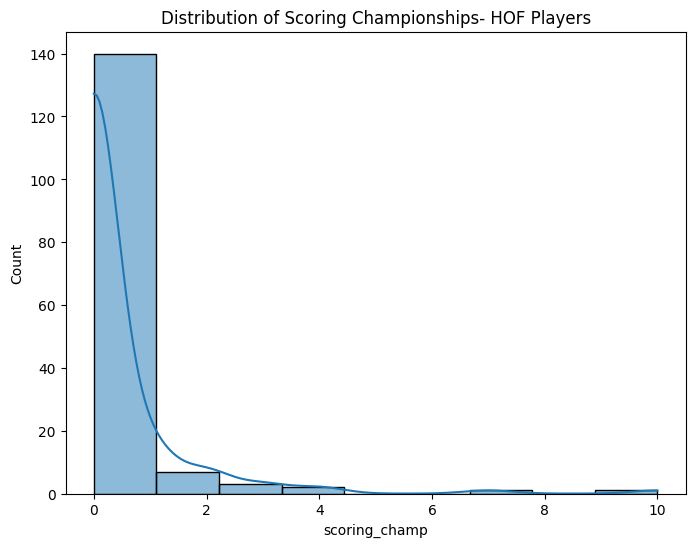

In [51]:
#Check distribution of the data
sns.histplot(x='scoring_champ', data=hof, kde=True)
plt.title('Distribution of Scoring Championships- HOF Players')
plt.show()

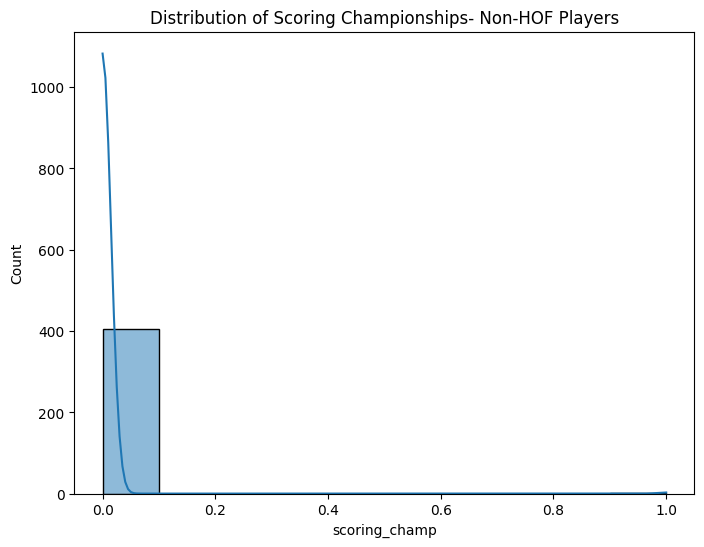

In [52]:
#Check distribution of the data
sns.histplot(x='scoring_champ', data=non_hof, kde=True)
plt.title('Distribution of Scoring Championships- Non-HOF Players')
plt.show()

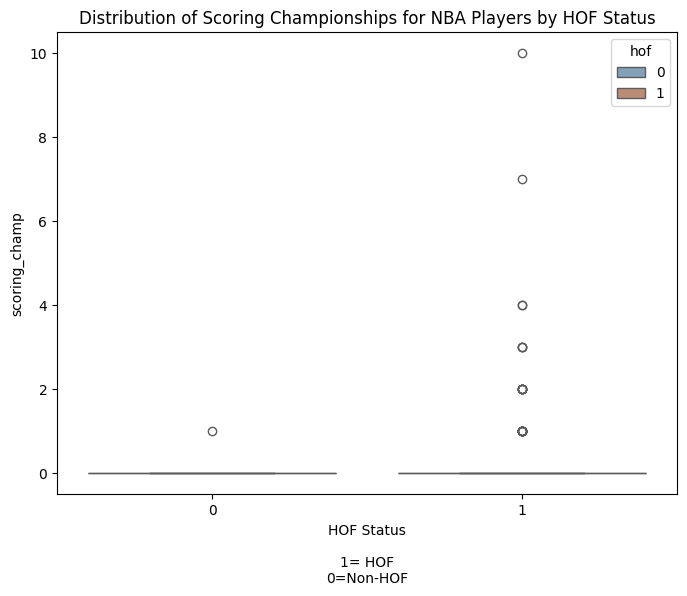

In [53]:
#Make grouped boxplot to analyze the differences by HOF status
sns.boxplot(x='hof', y='scoring_champ',data=df, hue='hof', palette='twilight_shifted')
plt.title('Distribution of Scoring Championships for NBA Players by HOF Status')
plt.xlabel('HOF Status\n\n1= HOF\n0=Non-HOF')
plt.show()

Another extremely rare award even for HOF Players.

In [54]:
df.columns

Index(['name', 'position', 'games', 'career_length', 'ppg', 'rpg', 'apg',
       'per', 'fg', 'ft', 'win_shares', 'all_stars', 'all_nba', 'all_defense',
       'rookie_team', 'mvps', 'chips', 'roy', 'dpoys', 'scoring_champ', 'hof'],
      dtype='object')

## HOF Status